In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('Daegu_Real_Estate_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [4]:
data.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


In [5]:
data.describe()

SalePrice    YearBuilt       YrSold    MonthSold    Size(sqf)  \
count    5891.000000  5891.000000  5891.000000  5891.000000  5891.000000   
mean   221218.112545  2002.967408  2012.691563     6.160244   955.569173   
std    106384.186446     8.811782     2.905488     3.387752   382.464050   
min     32743.000000  1978.000000  2007.000000     1.000000   135.000000   
25%    144247.000000  1993.000000  2010.000000     3.000000   644.000000   
50%    207964.000000  2006.000000  2013.000000     6.000000   910.000000   
75%    291150.000000  2008.000000  2015.000000     9.000000  1149.000000   
max    585840.000000  2015.000000  2017.000000    12.000000  2337.000000   

             Floor  N_Parkinglot(Ground)  N_Parkinglot(Basement)        N_APT  \
count  5891.000000           5891.000000             5891.000000  5891.000000   
mean     12.026311            195.883551              570.761670     5.613648   
std       7.548743            218.597210              408.621075     2.811831   
min       1.000000              0.000000                0.000000     1.000000   
25%       6.000000             11.000000              184.000000     3.000000   
50%      11.000000            100.000000              536.000000     7.000000   
75%      17.000000            249.000000              798.000000     8.000000   
max      43.000000            713.000000             1321.000000    13.000000   

         N_manager  ...  N_FacilitiesNearBy(Mall)  N_FacilitiesNearBy(ETC)  \
count  5891.000000  ...               5891.000000              5891.000000   
mean      6.310304  ...                  0.941436                 1.941266   
std       3.174088  ...                  0.401355                 2.201392   
min       1.000000  ...                  0.000000                 0.000000   
25%       5.000000  ...                  1.000000                 0.000000   
50%       6.000000  ...                  1.000000                 1.000000   
75%       8.000000  ...                  1.000000                 5.000000   
max      14.000000  ...                  2.000000                 5.000000   

       N_FacilitiesNearBy(Park)  N_SchoolNearBy(Elementary)  \
count               5891.000000                 5891.000000   
mean                   0.654218                    3.022407   
std                    0.658320                    0.954575   
min                    0.000000                    0.000000   
25%                    0.000000                    2.000000   
50%                    1.000000                    3.000000   
75%                    1.000000                    4.000000   
max                    2.000000                    6.000000   

       N_SchoolNearBy(Middle)  N_SchoolNearBy(High)  \
count             5891.000000           5891.000000   
mean                 2.417756              2.659311   
std                  1.037898              1.556041   
min                  0.000000              0.000000   
25%                  2.000000              1.000000   
50%                  3.000000              2.000000   
75%                  3.000000              4.000000   
max                  4.000000              5.000000   

       N_SchoolNearBy(University)  N_FacilitiesInApt  \
count                 5891.000000        5891.000000   
mean                     2.764726           5.809540   
std                      1.489289           2.330804   
min                      0.000000           1.000000   
25%                      2.000000           4.000000   
50%                      2.000000           5.000000   
75%                      4.000000           7.000000   
max                      5.000000          10.000000   

       N_FacilitiesNearBy(Total)  N_SchoolNearBy(Total)  
count                5891.000000            5891.000000  
mean                    9.870820              10.864200  
std                     3.450319               4.438513  
min                     0.000000               0.000000  
25%                     8.000000  

In [6]:
Counter(data['TimeToSubway'])

Counter({'10min~15min': 806,
         '5min~10min': 1135,
         '0-5min': 2759,
         '15min~20min': 953,
         'no_bus_stop_nearby': 238})

In [7]:
Counter(data['TimeToBusStop'])

Counter({'5min~10min': 1327, '0~5min': 4509, '10min~15min': 55})

In [8]:
subway_mapping = {'0-5min': 4, '5min~10min': 3, '10min~15min': 2, '15min~20min': 1, 'no_bus_stop_nearby': 0}
bus_mapping = {'0~5min': 2, '5min~10min': 1, '10min~15min': 0}

In [9]:
data['TimeToSubway'] = data['TimeToSubway'].map(subway_mapping)
data['TimeToBusStop'] = data['TimeToBusStop'].map(bus_mapping)

In [10]:
print('Number of features: {}'.format(data.shape[1]))
print('Numerical features: {}'.format(data.select_dtypes(['float','int']).shape[1]))
print('Missing values: {}\n'.format(data.isnull().sum().sum()))

Number of features: 30
Numerical features: 26
Missing values: 0



C:\Users\lenovo\AppData\Local\Temp/ipykernel_12756/1554417166.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


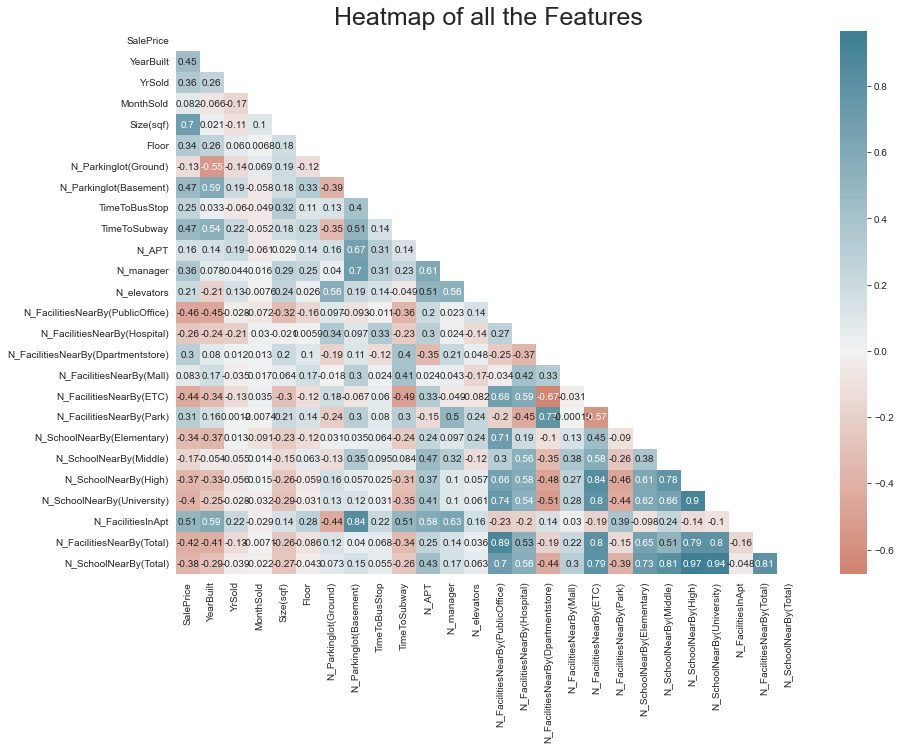

In [11]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (14,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 25);

<AxesSubplot:>

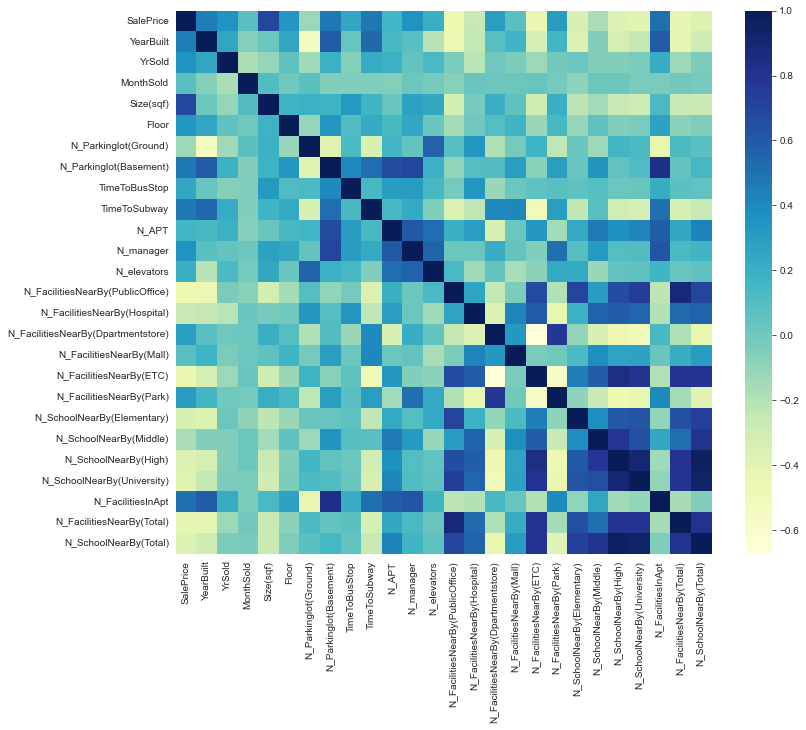

In [12]:
fig, ax = plt.subplots(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [13]:
corr.iloc[0]

SalePrice                             1.000000
YearBuilt                             0.447875
YrSold                                0.357682
MonthSold                             0.081924
Size(sqf)                             0.697199
Floor                                 0.336729
N_Parkinglot(Ground)                 -0.130549
N_Parkinglot(Basement)                0.473252
TimeToBusStop                         0.252062
TimeToSubway                          0.473886
N_APT                                 0.162684
N_manager                             0.358329
N_elevators                           0.208248
N_FacilitiesNearBy(PublicOffice)     -0.462234
N_FacilitiesNearBy(Hospital)         -0.257282
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_FacilitiesNearBy(Mall)              0.082979
N_FacilitiesNearBy(ETC)              -0.442299
N_FacilitiesNearBy(Park)              0.310906
N_SchoolNearBy(Elementary)           -0.341186
N_SchoolNearBy(Middle)               -0.166439
N_SchoolNearB

In [14]:
data['SalePrice'].skew()

0.4648820296365507

<AxesSubplot:>

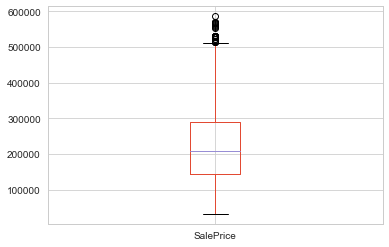

In [15]:
data.boxplot('SalePrice')

In [16]:
data_cat=data.select_dtypes(exclude=np.number)
data_num=data.select_dtypes(np.number)
data_cat=data_cat.reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

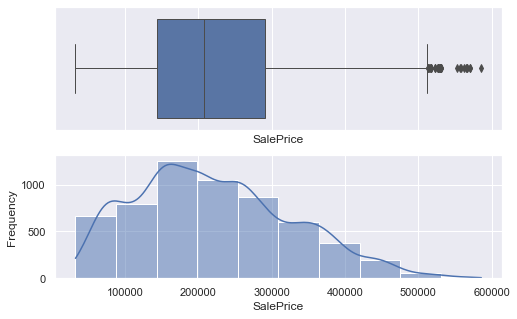

<Figure size 576x360 with 0 Axes>

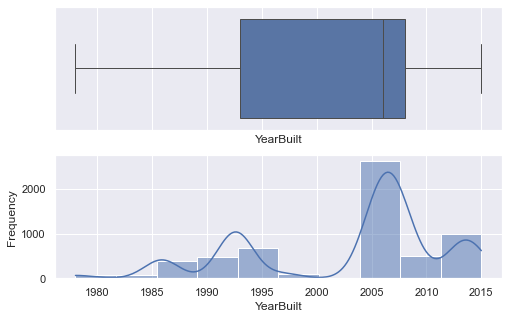

<Figure size 576x360 with 0 Axes>

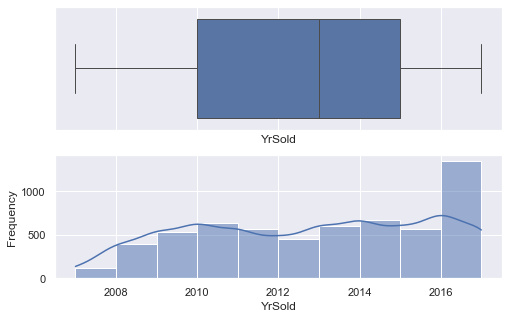

<Figure size 576x360 with 0 Axes>

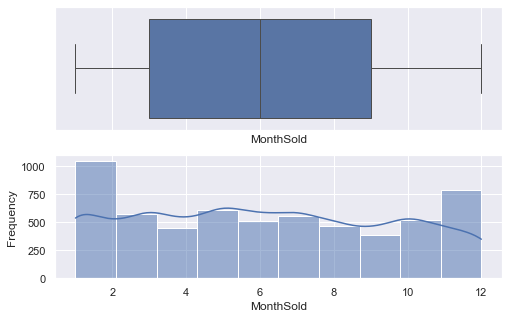

<Figure size 576x360 with 0 Axes>

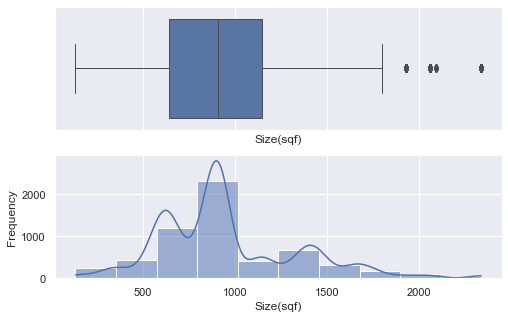

<Figure size 576x360 with 0 Axes>

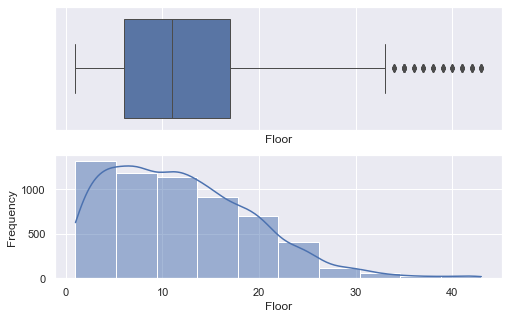

<Figure size 576x360 with 0 Axes>

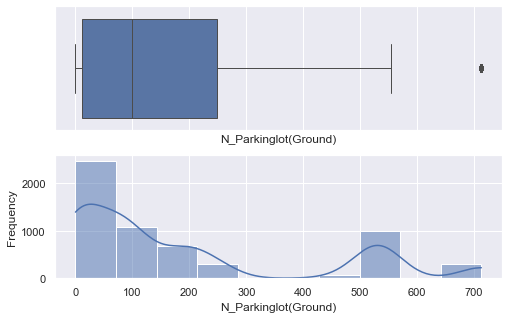

<Figure size 576x360 with 0 Axes>

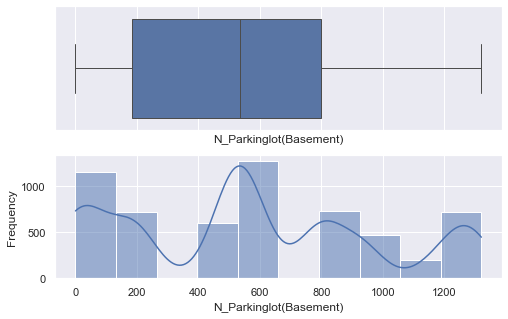

<Figure size 576x360 with 0 Axes>

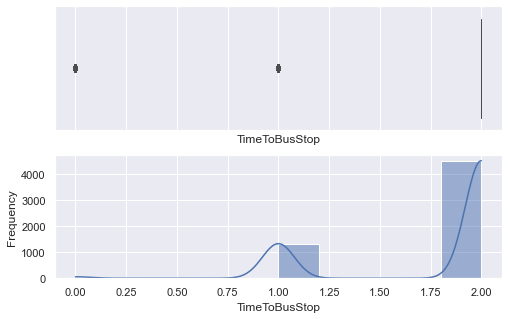

<Figure size 576x360 with 0 Axes>

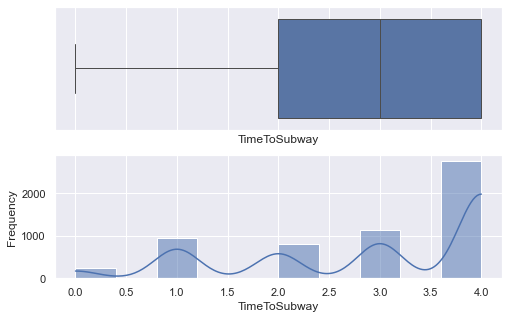

<Figure size 576x360 with 0 Axes>

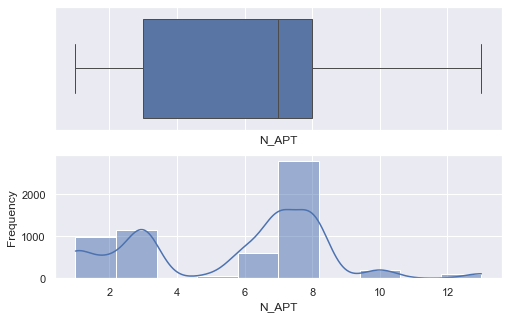

<Figure size 576x360 with 0 Axes>

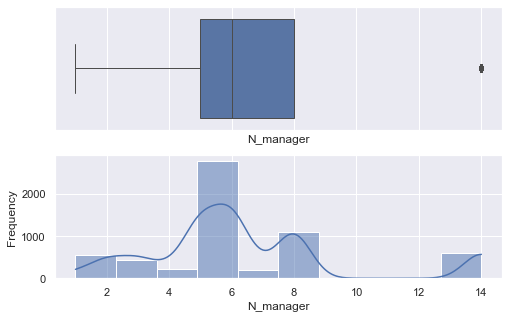

<Figure size 576x360 with 0 Axes>

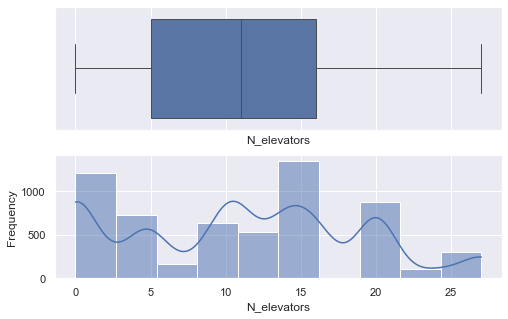

<Figure size 576x360 with 0 Axes>

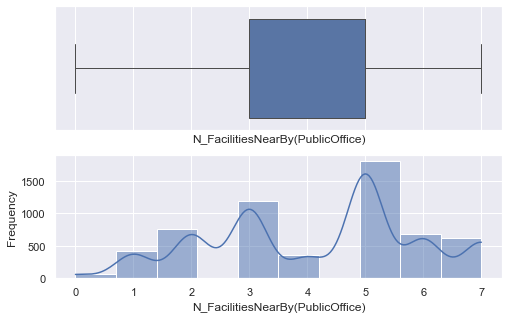

<Figure size 576x360 with 0 Axes>

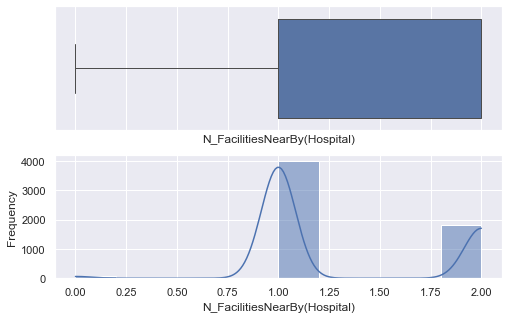

<Figure size 576x360 with 0 Axes>

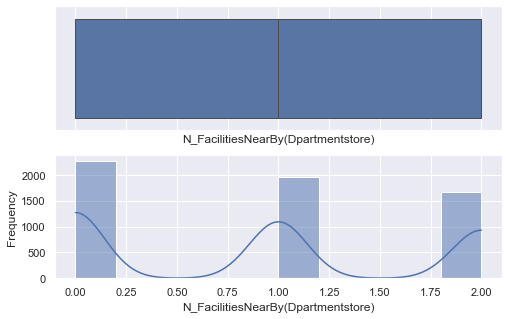

<Figure size 576x360 with 0 Axes>

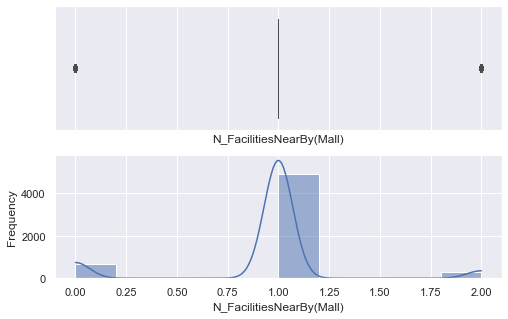

<Figure size 576x360 with 0 Axes>

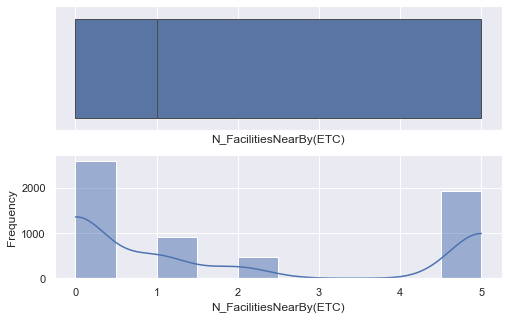

<Figure size 576x360 with 0 Axes>

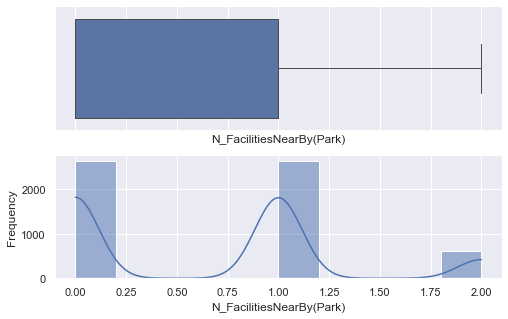

<Figure size 576x360 with 0 Axes>

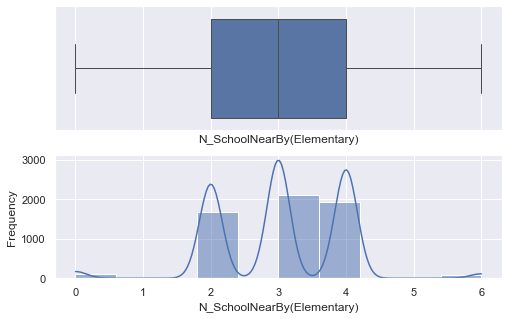

<Figure size 576x360 with 0 Axes>

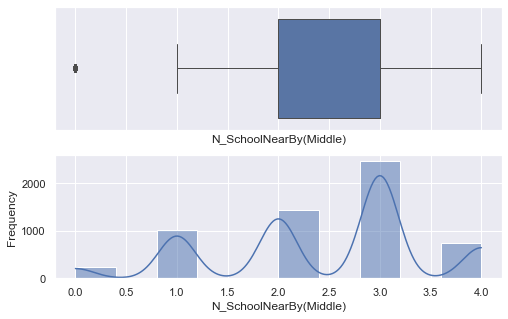

<Figure size 576x360 with 0 Axes>

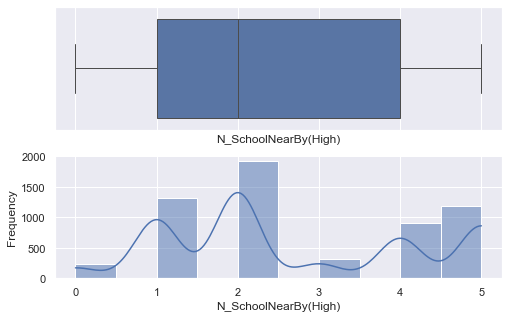

<Figure size 576x360 with 0 Axes>

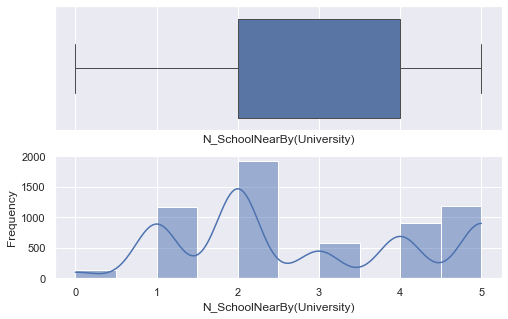

<Figure size 576x360 with 0 Axes>

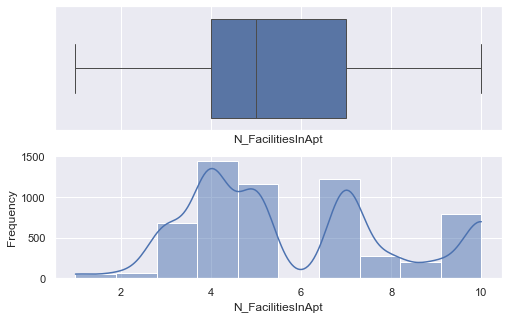

<Figure size 576x360 with 0 Axes>

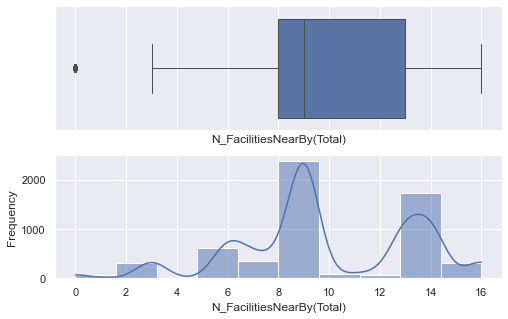

<Figure size 576x360 with 0 Axes>

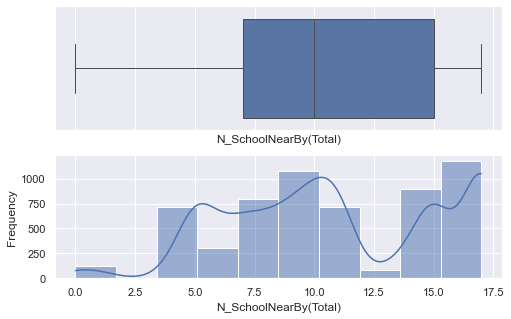

In [17]:
for i in data_num.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(data[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(data[i], ax=ax_hist , bins = 10,kde=True)

In [18]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1
IQR

data = data[~((data) > (q3 + (1.5 * IQR))).any(axis=1)]

data.head()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_12756/416174173.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data) > (q3 + (1.5 * IQR))).any(axis=1)]


SalePrice  YearBuilt  YrSold  MonthSold  Size(sqf)  Floor HallwayType  \
0     141592       2006    2007          8        814      3    terraced   
1      51327       1985    2007          8        587      8    corridor   
2      48672       1985    2007          8        587      6    corridor   
4     221238       1993    2007          8       1761      3       mixed   
5      35840       1992    2007          8        355      5    corridor   

          HeatingType        AptManageType  N_Parkinglot(Ground)  ...  \
0  individual_heating  management_in_trust                 111.0  ...   
1  individual_heating      self_management                  80.0  ...   
2  individual_heating      self_management                  80.0  ...   
4  individual_heating  management_in_trust                 523.0  ...   
5  individual_heating  management_in_trust                 200.0  ...   

   N_FacilitiesNearBy(Mall)  N_FacilitiesNearBy(ETC)  \
0                       1.0                      1.0   
1                       1.0                      2.0   
2                       1.0                      2.0   
4                       1.0                      5.0   
5                       1.0                      5.0   

   N_FacilitiesNearBy(Park)  N_SchoolNearBy(Elementary)  \
0                       0.0                         3.0   
1                       1.0                         2.0   
2                       1.0                         2.0   
4                       0.0                         4.0   
5                       1.0                         4.0   

   N_SchoolNearBy(Middle)  N_SchoolNearBy(High) N_SchoolNearBy(University)  \
0                     2.0                   2.0                        2.0   
1                     1.0                   1.0                        0.0   
2                     1.0                   1.0                        0.0   
4                     3.0                   5.0                        5.0   
5                     3.0                   5.0                        5.0   

   N_FacilitiesInApt  N_FacilitiesNearBy(Total)  N_SchoolNearBy(Total)  
0                  5                        6.0                    9.0  
1                  3                       12.0                    4.0  
2                  3                       12.0                    4.0  
4                  4                       14.0                   17.0  
5                  3                       16.0                   17.0  

[5 rows x 30 columns]

In [19]:
data.shape

(4579, 30)

<AxesSubplot:ylabel='SalePrice'>

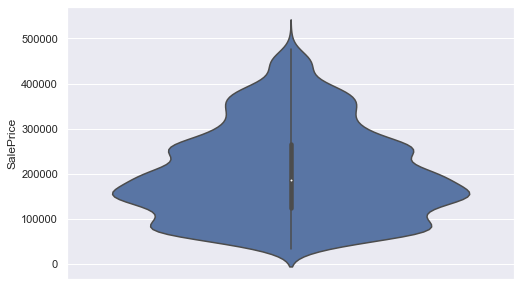

In [20]:
sns.violinplot(y = data.SalePrice)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


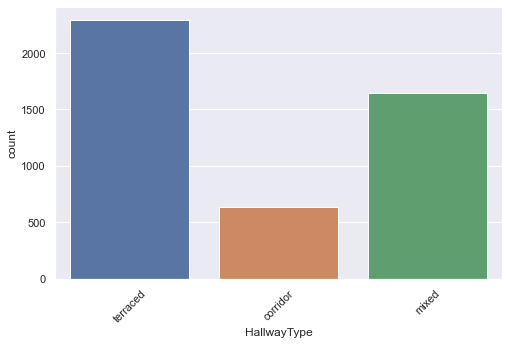

In [21]:
sns.countplot(data.HallwayType)
plt.xticks(rotation = 45)
plt.show()

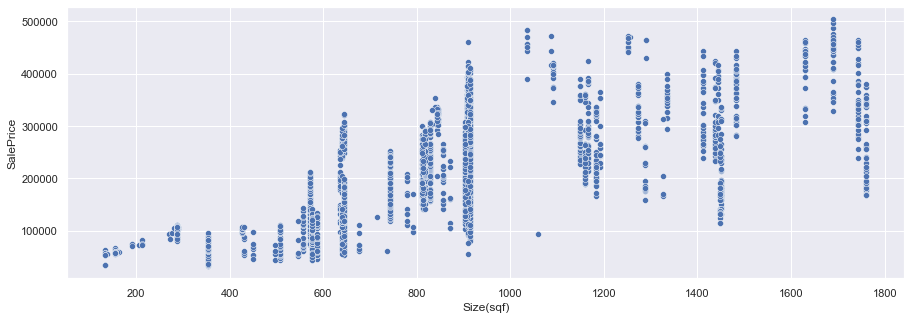

In [22]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Size(sqf)", y="SalePrice", data=data)
plt.show()

In [23]:
data=pd.get_dummies(data,columns=['HallwayType','HeatingType','AptManageType','SubwayStation'])

In [24]:
data.head()

SalePrice  YearBuilt  YrSold  MonthSold  Size(sqf)  Floor  \
0     141592       2006    2007          8        814      3   
1      51327       1985    2007          8        587      8   
2      48672       1985    2007          8        587      6   
4     221238       1993    2007          8       1761      3   
5      35840       1992    2007          8        355      5   

   N_Parkinglot(Ground)  N_Parkinglot(Basement)  TimeToBusStop  TimeToSubway  \
0                 111.0                   184.0              1             2   
1                  80.0                    76.0              2             3   
2                  80.0                    76.0              2             3   
4                 523.0                   536.0              2             1   
5                 200.0                     0.0              1             2   

   ...  AptManageType_management_in_trust  AptManageType_self_management  \
0  ...                                  1                              0   
1  ...                                  0                              1   
2  ...                                  0                              1   
4  ...                                  1                              0   
5  ...                                  1                              0   

   SubwayStation_Bangoge  SubwayStation_Banwoldang  \
0                      0                         0   
1                      0                         0   
2                      0                         0   
4                      0                         0   
5                      0                         0   

   SubwayStation_Chil-sung-market  SubwayStation_Daegu  \
0                               0                    0   
1                               0                    1   
2                               0                    1   
4                               0                    0   
5                               0                    0   

   SubwayStation_Kyungbuk_uni_hospital  SubwayStation_Myung-duk  \
0                                    1                        0   
1                                    0                        0   
2                                    0                        0   
4                                    0                        1   
5                                    0                        1   

   SubwayStation_Sin-nam  SubwayStation_no_subway_nearby  
0                      0                               0  
1                      0                               0  
2                      0                               0  
4                      0                               0  
5                      0                               0  

[5 rows x 40 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\P

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\P

<Figure size 576x360 with 0 Axes>

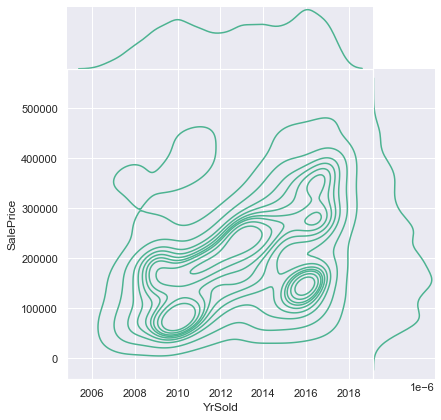

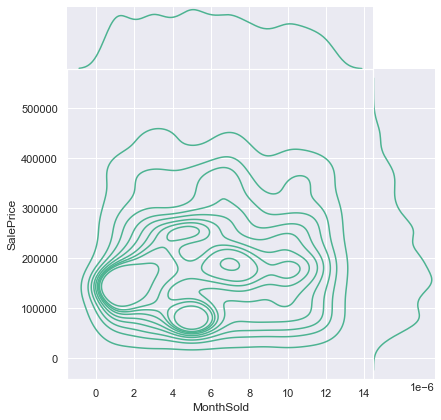

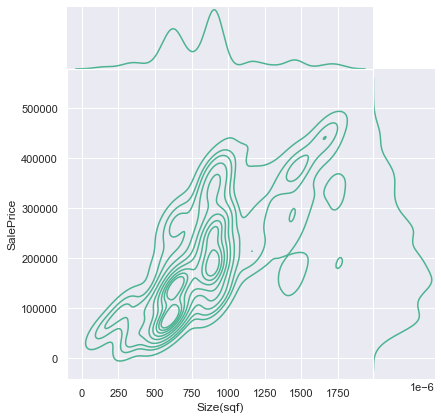

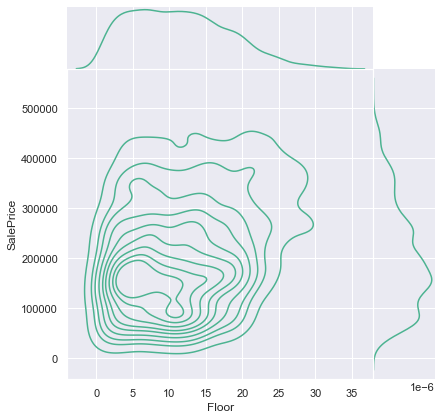

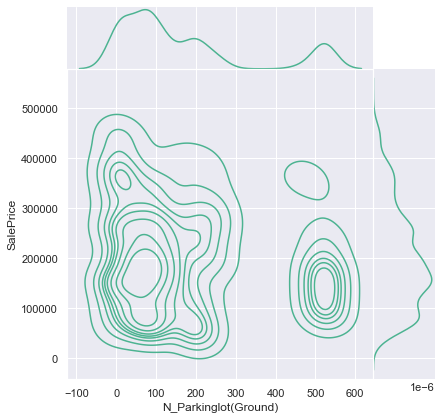

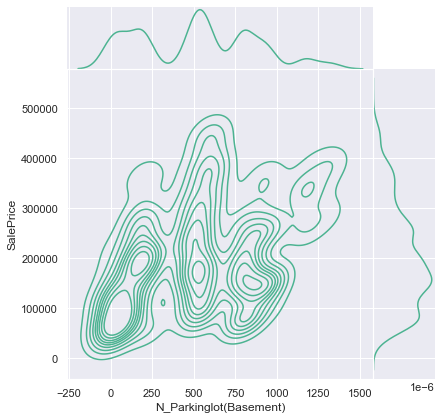

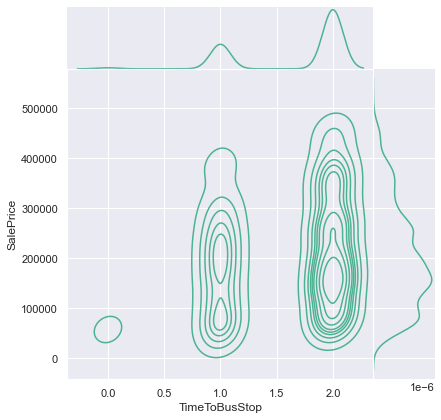

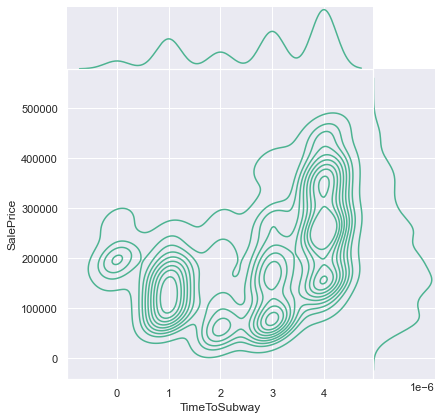

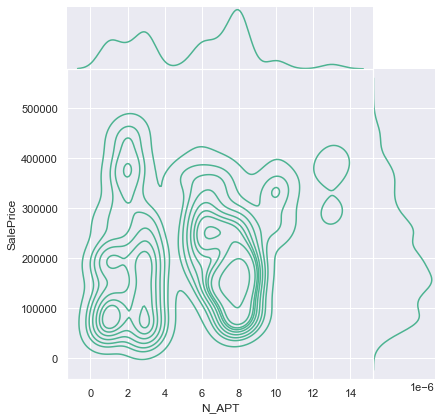

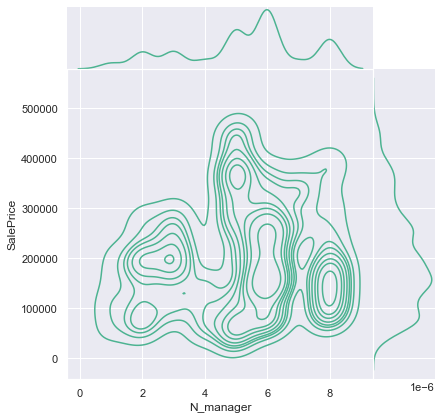

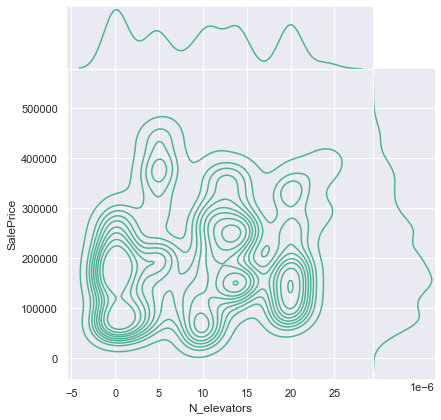

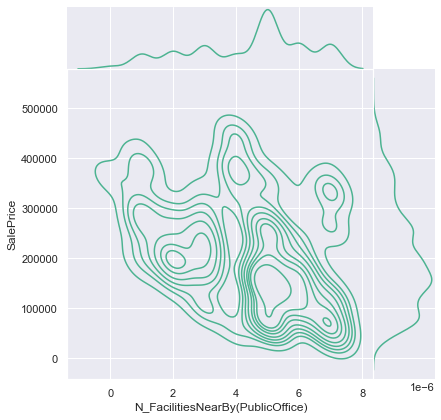

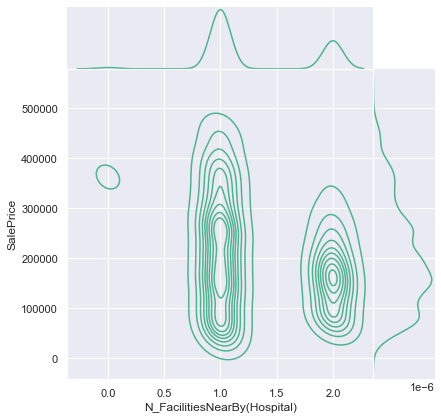

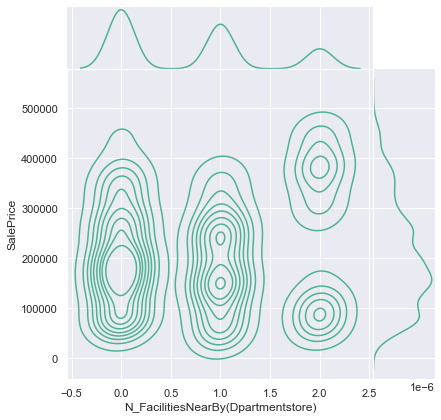

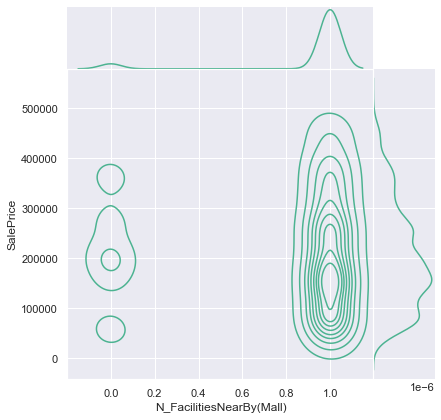

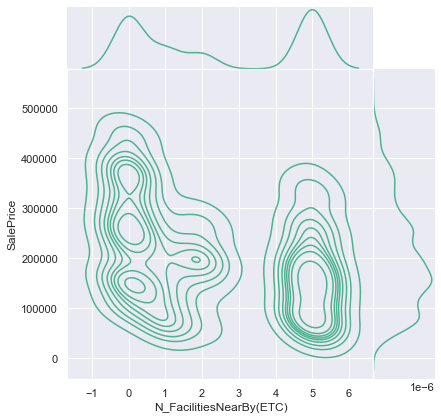

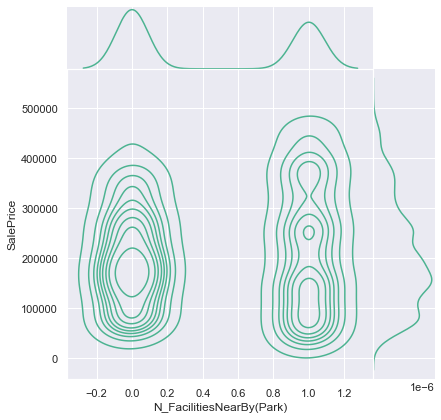

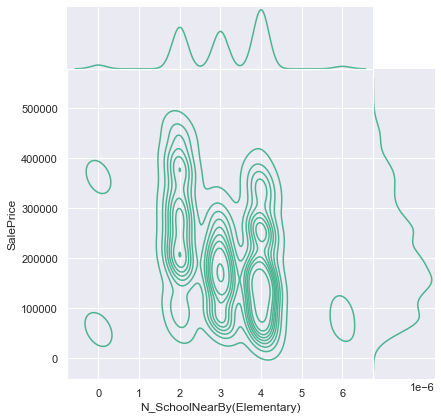

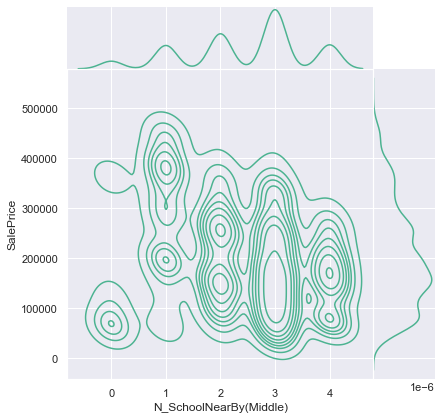

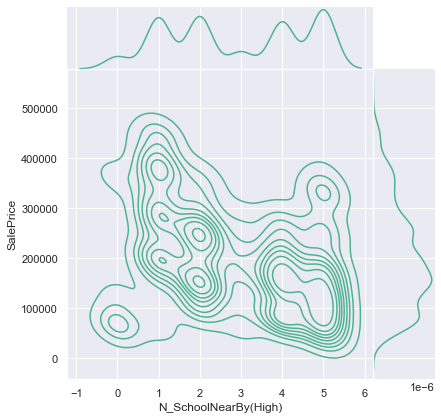

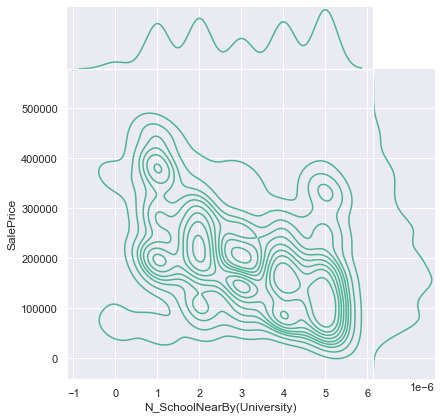

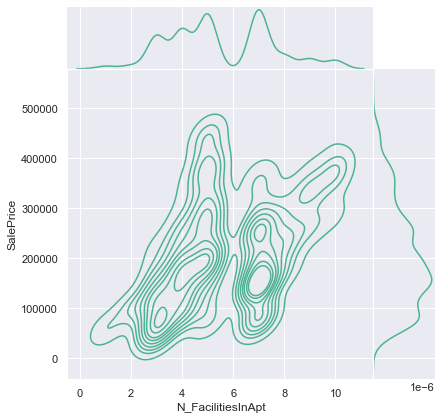

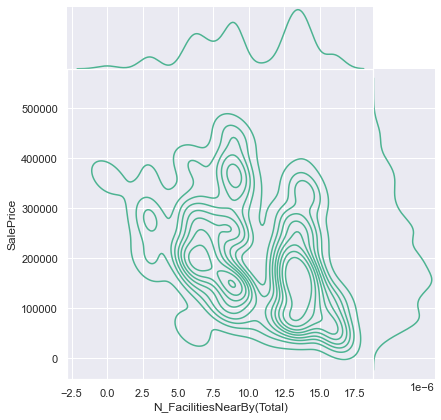

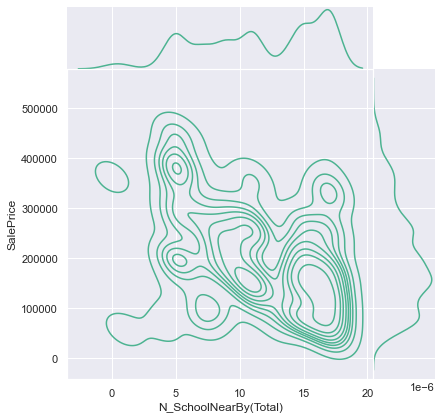

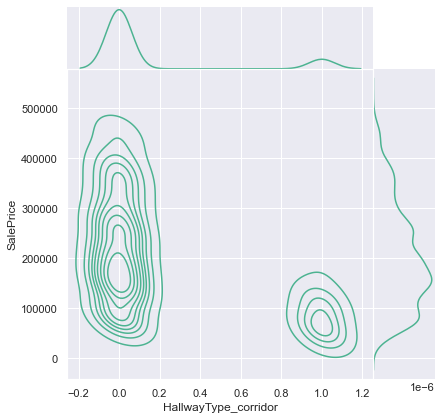

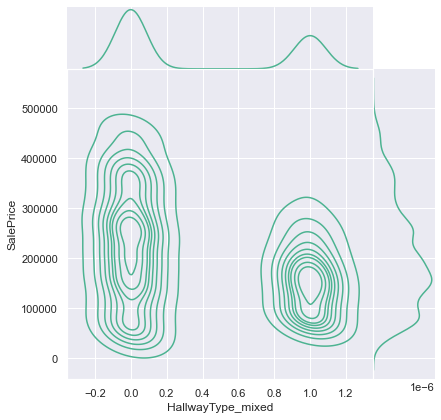

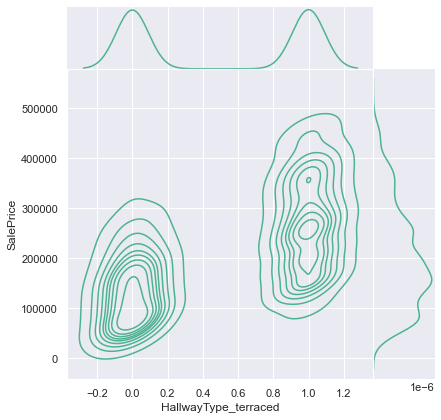

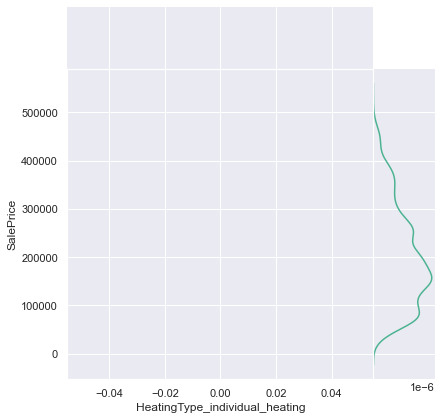

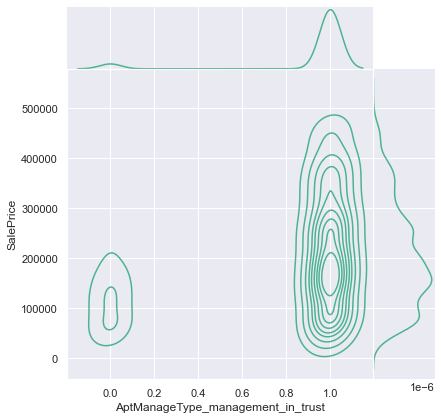

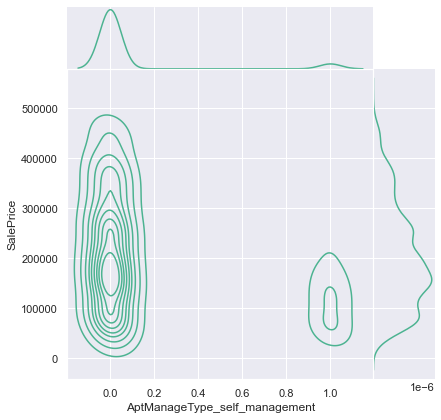

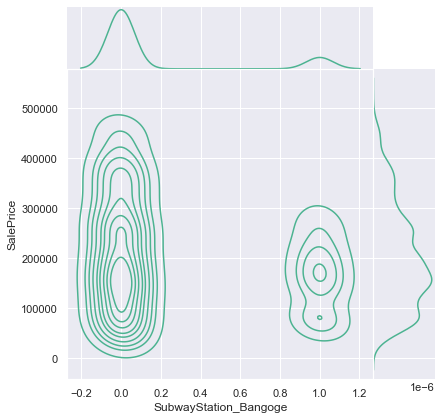

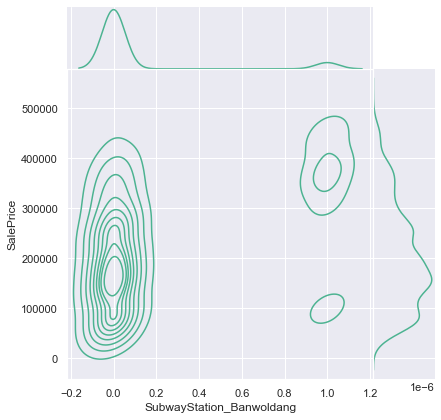

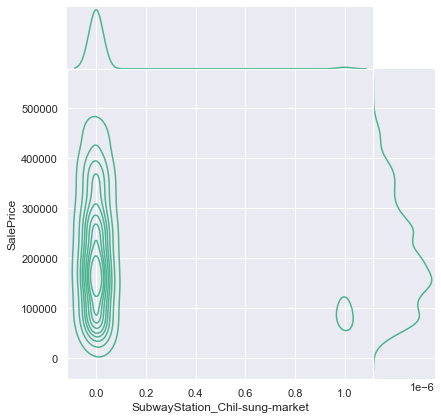

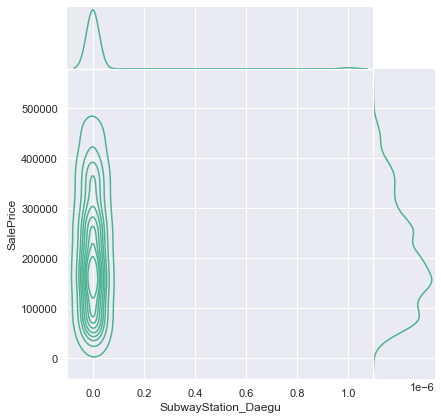

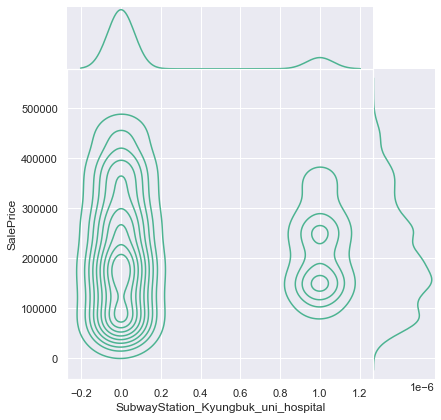

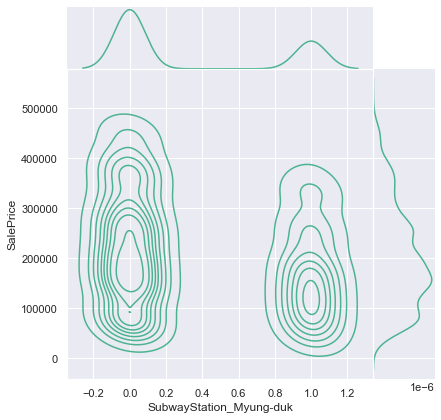

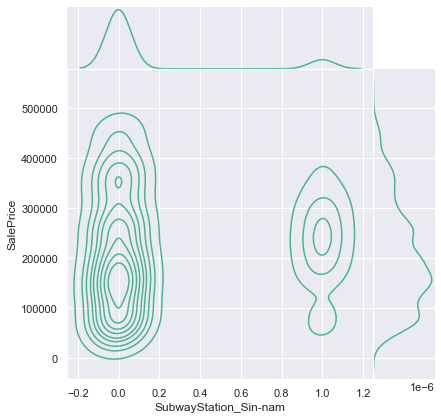

In [25]:
fig = plt.figure()

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2,len(data.columns)-1):
    sns.jointplot(str(data.columns[i]),'SalePrice',data, kind="kde",space=0, color="#4CB391")

In [26]:
df_my_selected_features = data[data.columns]

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
y =   data[data.columns[0]]

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features =scaler.fit_transform(data.values)
df_features_scaled = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)

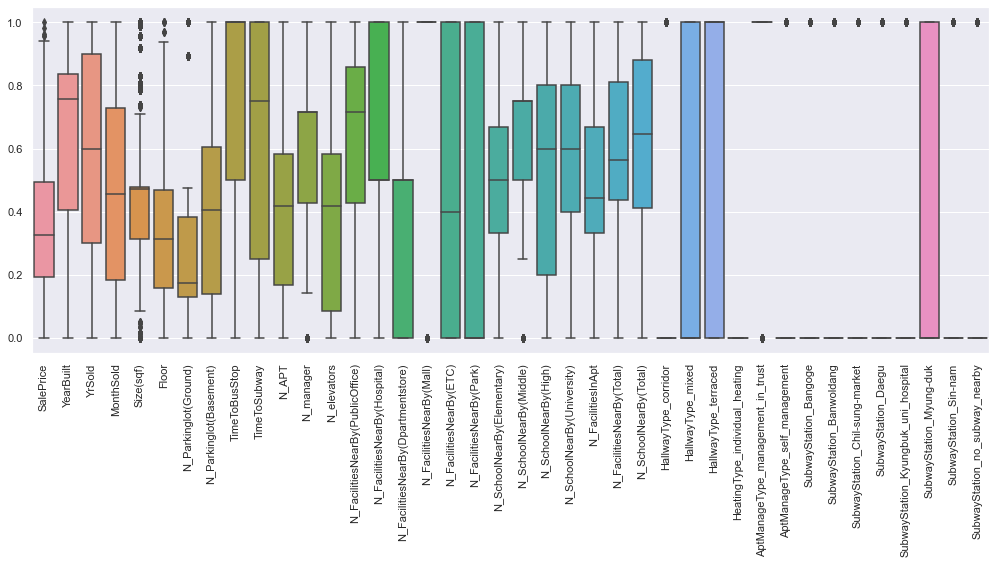

In [30]:
plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_scaled )
plt.xticks(rotation=90)  

plt.tight_layout()

In [ ]:
#ss=MinMaxScaler()
#data=pd.DataFrame(ss.fit_transform(data),columns=data.columns)
#data=data.reset_index()
#data.head()

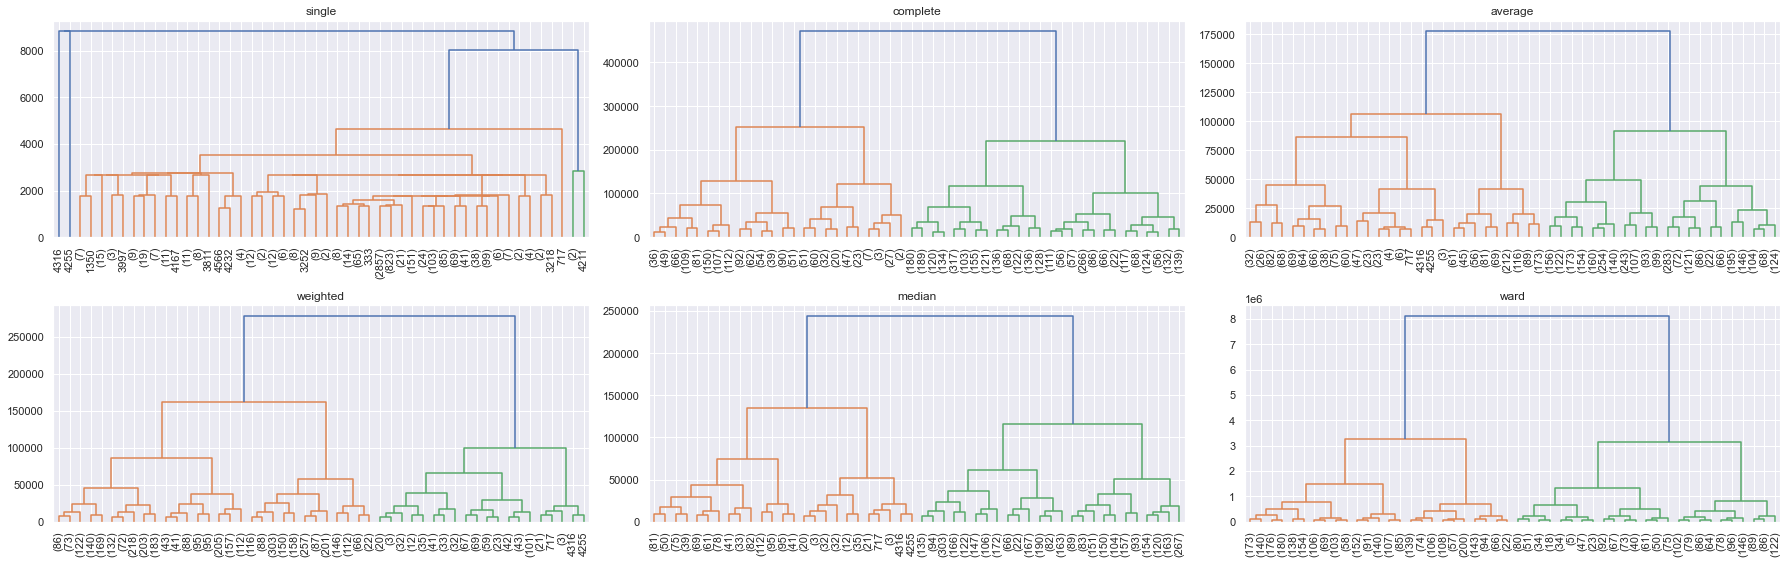

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage,median

D = data.values

methods = ['single','complete','average','weighted','median','ward']
plt.figure(figsize=(25, 8))
for i in range(len(methods)):
    plt.subplot(231+i)
    Z = linkage(D, method=methods[i])
    de = dendrogram(
      Z,
      leaf_rotation=90.,
      leaf_font_size=11.,
      distance_sort='descending',
      truncate_mode = 'lastp',
      p=50
      
  )
    plt.title(methods[i])

plt.tight_layout()

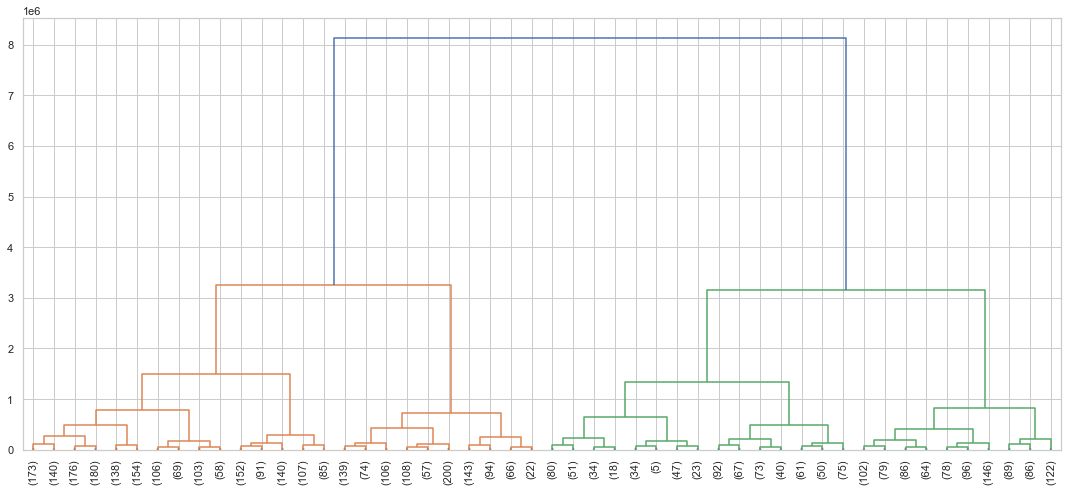

In [32]:
sns.set_style('whitegrid') 
D = data.values

Z = linkage(D, method='ward', metric='euclidean')
 
plt.figure(figsize=(15, 7))
dendrogram(
    Z,
    
    leaf_rotation=90.,
    leaf_font_size=11.,
    show_contracted=True,
    distance_sort='descending',
    truncate_mode = 'lastp',
    p=50
)

plt.tight_layout()

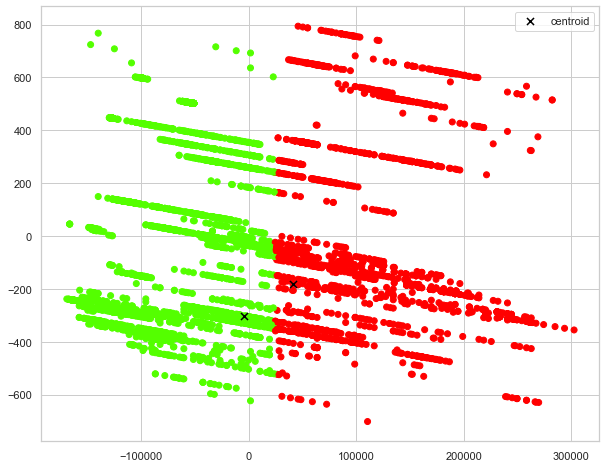

In [33]:
from sklearn.decomposition import PCA,KernelPCA
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage,median
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
pca_2d = PCA(n_components=2)
X = pca_2d.fit_transform(D)
Y = pdist(D, 'euclidean')
Y = squareform(Y)
Y.shape
k=2
clusters = fcluster(Z, k, criterion='maxclust')

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.scatter([X[504,0], X[74,0]],[X[504,1], X[74,1]], c='black', cmap='prism',marker='x',s=50,
            label="centroid")
plt.legend()

plt.show()

In [34]:
#scaler = MinMaxScaler()
#scaled_features =scaler.fit_transform(data.values)
#df_features_scaled = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)
noscaled_features =scaler.inverse_transform(data.values)# de normalizzo per vedere i valori reali dei centroidi
df_features_noscaled = pd.DataFrame(noscaled_features, index=data.index, columns=data.columns)
df_features_y =  pd.concat([df_features_noscaled,y], axis=1)
print("----------------- Centroide Cluster 1 ----------------- ")
print(df_features_y.iloc[70,:])
print("----------------- Centroide Cluster 2 ----------------- ")
print(df_features_y.iloc[504,:])

----------------- Centroide Cluster 1 ----------------- 
SalePrice                              2.921878e+10
YearBuilt                              7.568200e+04
YrSold                                 2.207700e+04
MonthSold                              1.220000e+02
Size(sqf)                              9.367110e+05
Floor                                  2.570000e+02
N_Parkinglot(Ground)                   1.046000e+05
N_Parkinglot(Basement)                 0.000000e+00
TimeToBusStop                          2.000000e+00
TimeToSubway                           8.000000e+00
N_APT                                  3.700000e+01
N_manager                              3.600000e+01
N_elevators                            2.400000e+02
N_FacilitiesNearBy(PublicOffice)       4.900000e+01
N_FacilitiesNearBy(Hospital)           2.000000e+00
N_FacilitiesNearBy(Dpartmentstore)     2.000000e+00
N_FacilitiesNearBy(Mall)               1.000000e+00
N_FacilitiesNearBy(ETC)                2.500000e+01
N_Facil

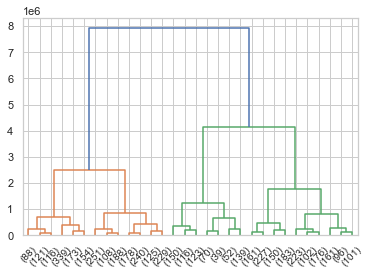

In [35]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
cls=data[['Size(sqf)','SalePrice']]
mergings=linkage(cls,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [36]:
cluster=cut_tree(mergings,n_clusters=3)

In [37]:
cluster_cut = pd.Series(cut_tree(mergings,n_clusters=3).reshape(-1))

In [38]:
cluster_cut.value_counts()

0    2310
1    1580
2     689
dtype: int64

In [39]:
data['cluster']=cluster

<AxesSubplot:xlabel='Size(sqf)', ylabel='SalePrice'>

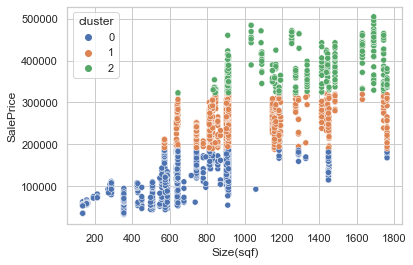

In [40]:
sns.scatterplot(y=data.SalePrice,x=data['Size(sqf)'],hue=data['cluster'],palette='deep')

In [41]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as metrics
for i in range(3,13):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(data).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.5638082065995477
Silhouette score for k(clusters) = 4 is 0.5893877273015617
Silhouette score for k(clusters) = 5 is 0.5720476642800905
Silhouette score for k(clusters) = 6 is 0.5625349321655921
Silhouette score for k(clusters) = 7 is 0.5703726628309512
Silhouette score for k(clusters) = 8 is 0.5673446010770803
Silhouette score for k(clusters) = 9 is 0.5693630960418085
Silhouette score for k(clusters) = 10 is 0.5645088144611369
Silhouette score for k(clusters) = 11 is 0.5610776116080449
Silhouette score for k(clusters) = 12 is 0.5574719374168603


In [42]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)

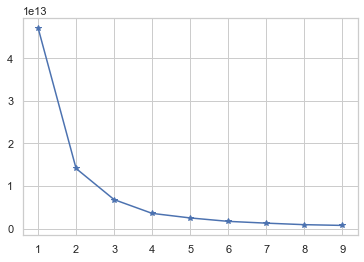

In [43]:
plt.plot(range(1,10),ssd,marker='*',color='b')

In [44]:
from sklearn.metrics import silhouette_score

score = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    labels = kmeans.labels_
    ss = silhouette_score(data,labels)
    score.append(ss)

Text(0.5, 0, 'no of clusters')

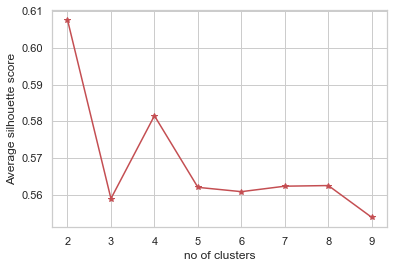

In [45]:
plt.plot(range(2,10),score,marker='*',color='r')
plt.ylabel('Average silhouette score')
plt.xlabel('no of clusters')

In [46]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data)
data['kmeans_cluster']=cluster_kmeans
data.head()

SalePrice  YearBuilt  YrSold  MonthSold  Size(sqf)  Floor  \
0     141592       2006    2007          8        814      3   
1      51327       1985    2007          8        587      8   
2      48672       1985    2007          8        587      6   
4     221238       1993    2007          8       1761      3   
5      35840       1992    2007          8        355      5   

   N_Parkinglot(Ground)  N_Parkinglot(Basement)  TimeToBusStop  TimeToSubway  \
0                 111.0                   184.0              1             2   
1                  80.0                    76.0              2             3   
2                  80.0                    76.0              2             3   
4                 523.0                   536.0              2             1   
5                 200.0                     0.0              1             2   

   ...  SubwayStation_Bangoge  SubwayStation_Banwoldang  \
0  ...                      0                         0   
1  ...                      0                         0   
2  ...                      0                         0   
4  ...                      0                         0   
5  ...                      0                         0   

   SubwayStation_Chil-sung-market  SubwayStation_Daegu  \
0                               0                    0   
1                               0                    1   
2                               0                    1   
4                               0                    0   
5                               0                    0   

   SubwayStation_Kyungbuk_uni_hospital  SubwayStation_Myung-duk  \
0                                    1                        0   
1                                    0                        0   
2                                    0                        0   
4                                    0                        1   
5                                    0                        1   

   SubwayStation_Sin-nam  SubwayStation_no_subway_nearby  cluster  \
0                      0                               0        0   
1                      0                               0        0   
2                      0                               0        0   
4                      0                               0        1   
5                      0                               0        0   

   kmeans_cluster  
0               2  
1               2  
2               2  
4               0  
5               2  

[5 rows x 42 columns]

In [48]:
data["kmeans_cluster"] = data["kmeans_cluster"] + 1
data.groupby("kmeans_cluster").agg({"kmeans_cluster": "count"})

kmeans_cluster
kmeans_cluster                
1                         1762
2                          915
3                         1902

In [49]:
data.groupby("kmeans_cluster").agg(np.mean)

SalePrice    YearBuilt       YrSold  MonthSold  \
kmeans_cluster                                                       
1               221207.593076  2004.805335  2012.917707   6.377412   
2               360097.765027  2009.468852  2014.503825   6.394536   
3               107981.331230  1998.998948  2011.916404   5.563617   

                  Size(sqf)      Floor  N_Parkinglot(Ground)  \
kmeans_cluster                                                 
1                929.280931  11.634506            160.322361   
2               1182.993443  14.328962            123.932240   
3                632.347003   9.845426            177.588328   

                N_Parkinglot(Basement)  TimeToBusStop  TimeToSubway  ...  \
kmeans_cluster                                                       ...   
1                           526.802497       1.682747      2.704881  ...   
2                           726.700546       1.812022      3.684153  ...   
3                           409.975289       1.629338      2.290747  ...   

                AptManageType_self_management  SubwayStation_Bangoge  \
kmeans_cluster                                                         
1                                    0.036322               0.210556   
2                                    0.001093               0.017486   
3                                    0.149317               0.184017   

                SubwayStation_Banwoldang  SubwayStation_Chil-sung-market  \
kmeans_cluster                                                             
1                               0.005675                        0.003973   
2                               0.390164                        0.000000   
3                               0.036278                        0.056782   

                SubwayStation_Daegu  SubwayStation_Kyungbuk_uni_hospital  \
kmeans_cluster                                                             
1                          0.004540                             0.182179   
2                          0.013115                             0.116940   
3                          0.034175                             0.158780   

                SubwayStation_Myung-duk  SubwayStation_Sin-nam  \
kmeans_cluster                                                   
1                              0.259932               0.212826   
2                              0.179235               0.166120   
3                              0.441115               0.044690   

                SubwayStation_no_subway_nearby   cluster  
kmeans_cluster                                            
1                                     0.120318  0.768445  
2                                     0.116940  1.753005  
3                                     0.044164  0.000000  

[3 rows x 41 columns]

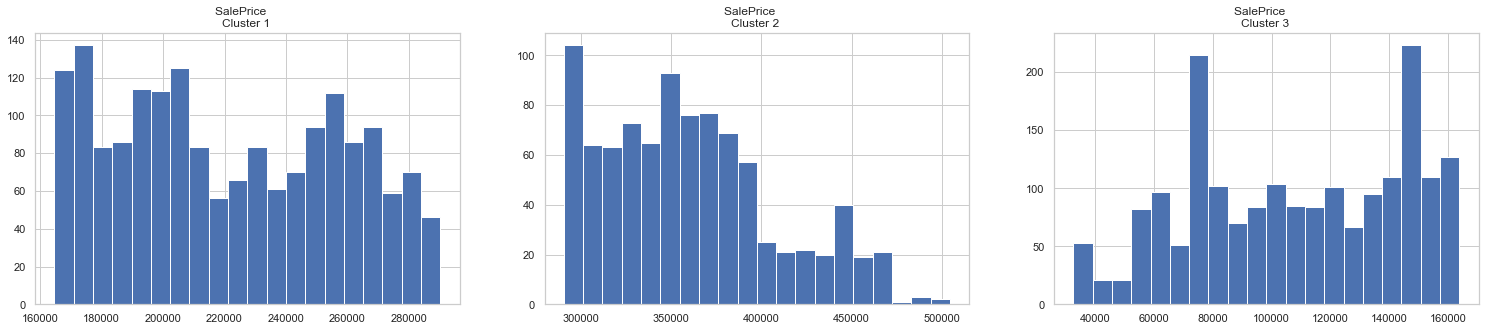

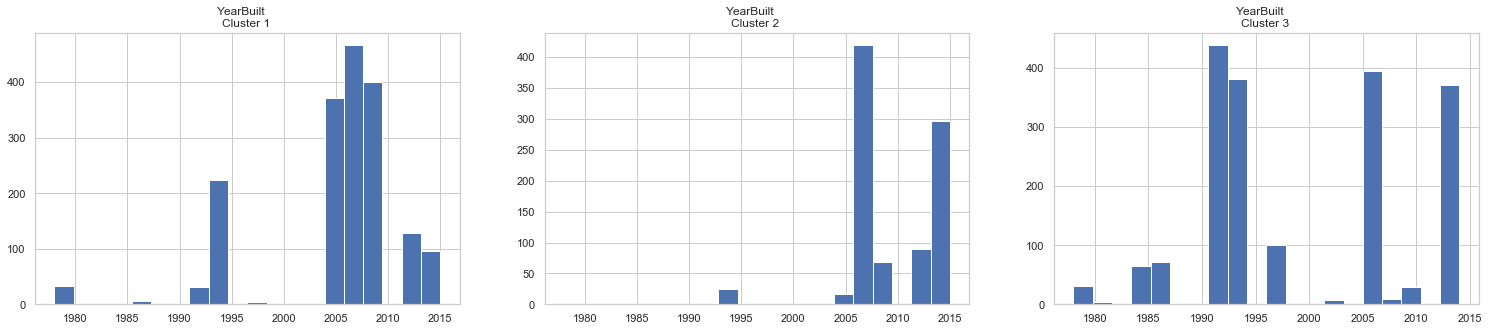

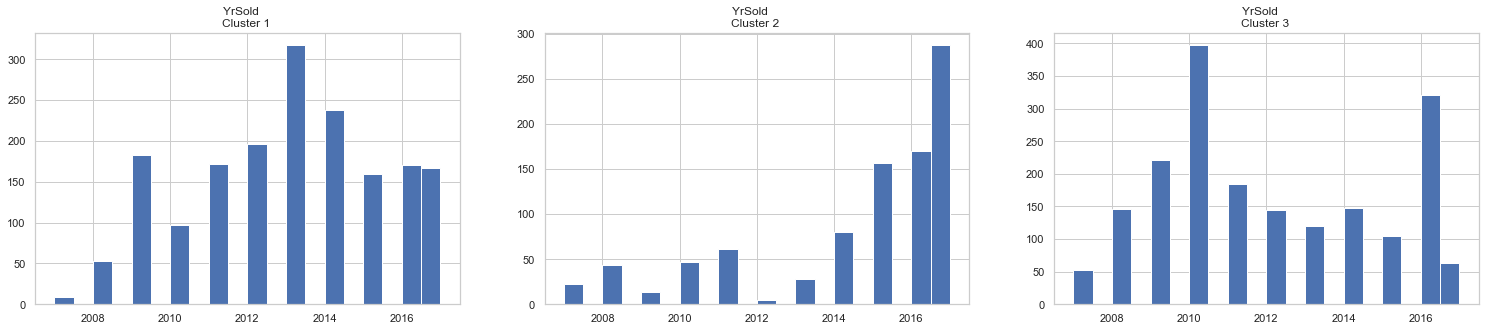

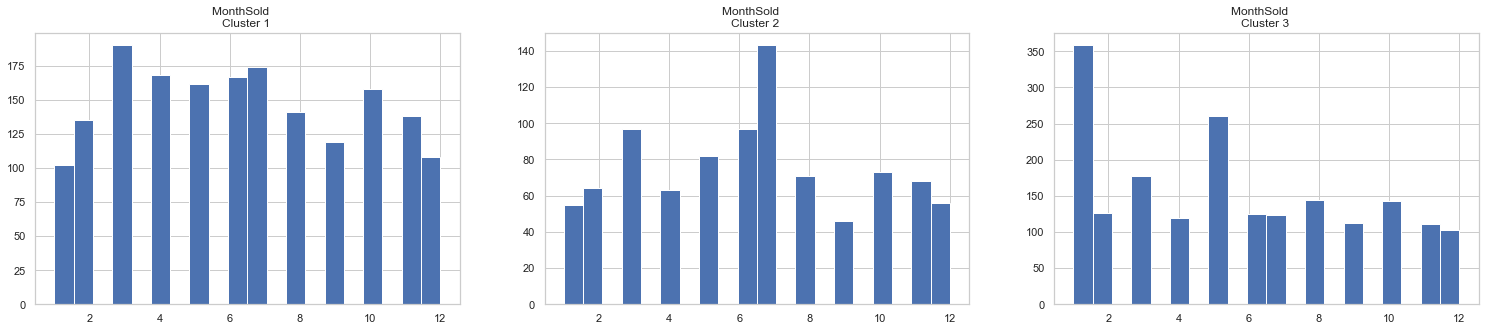

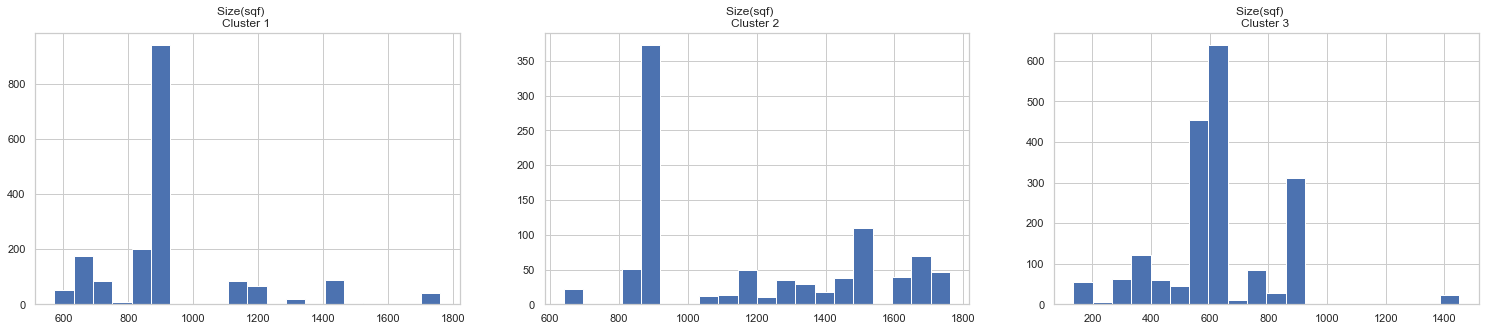

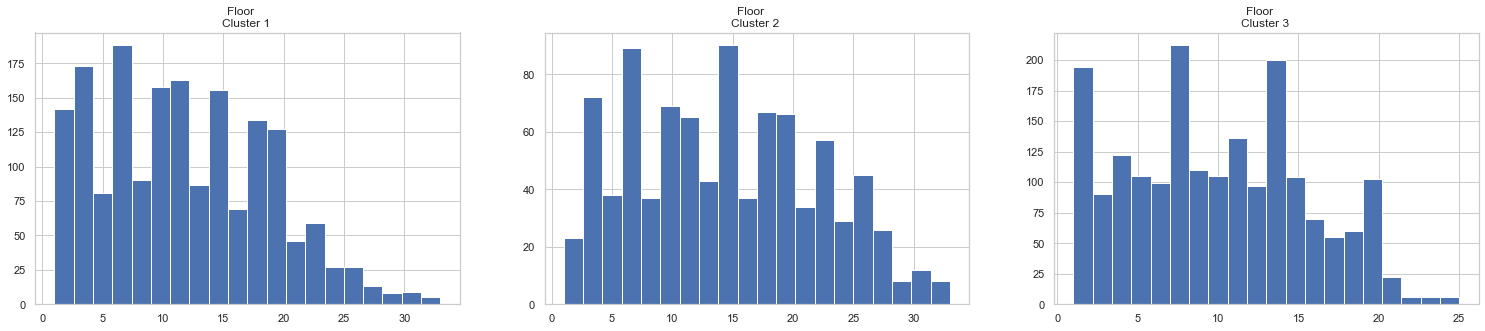

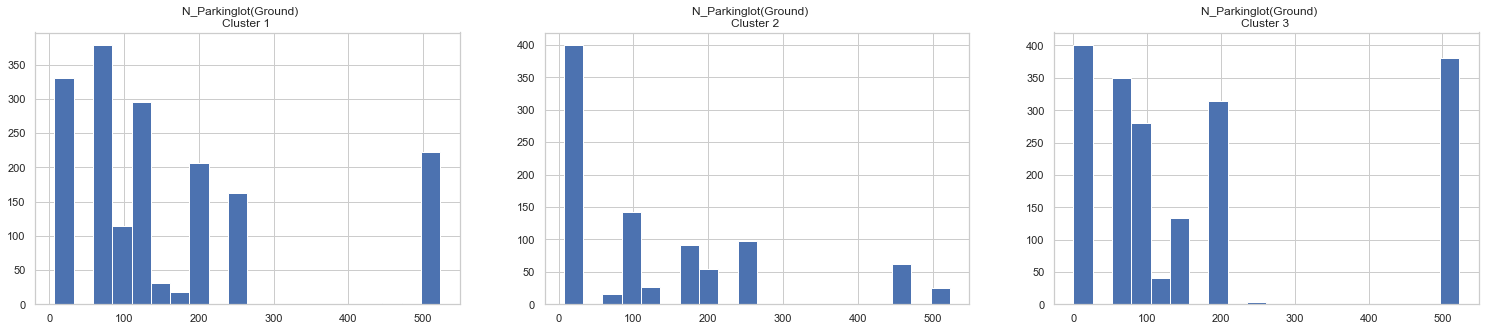

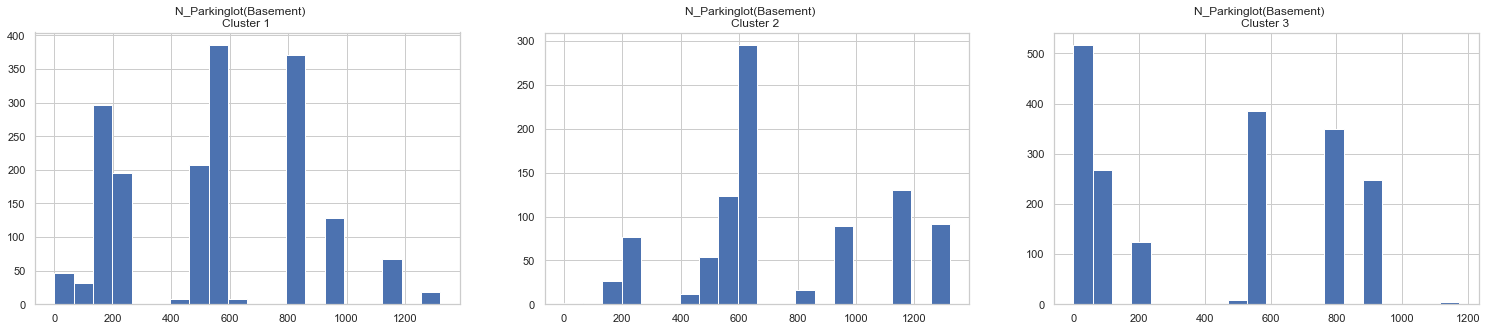

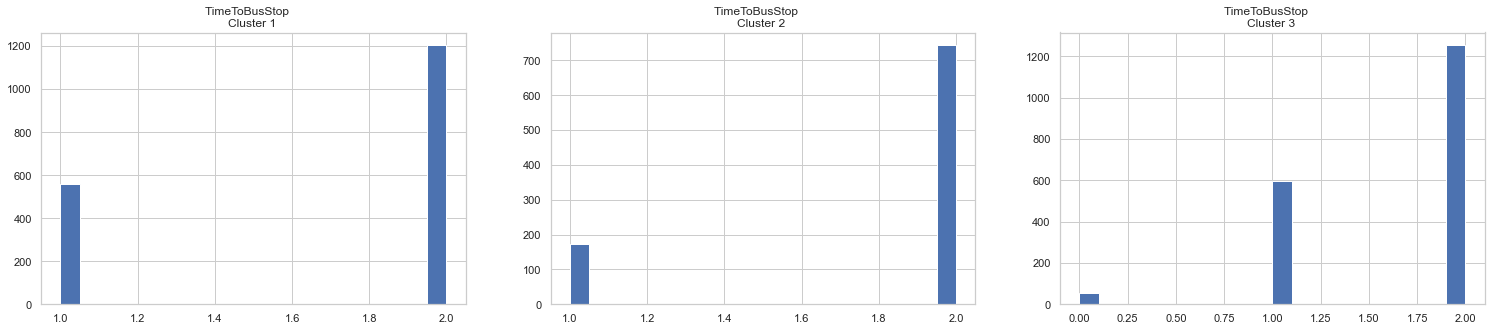

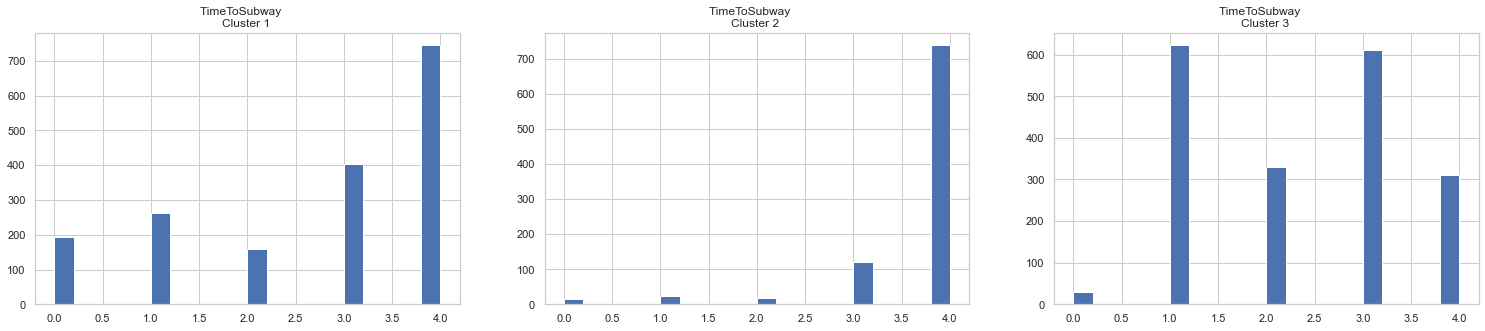

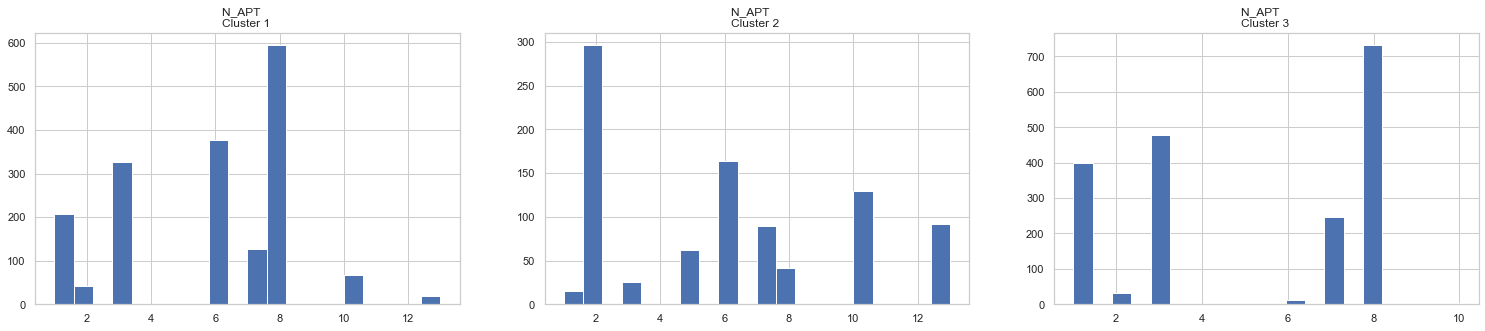

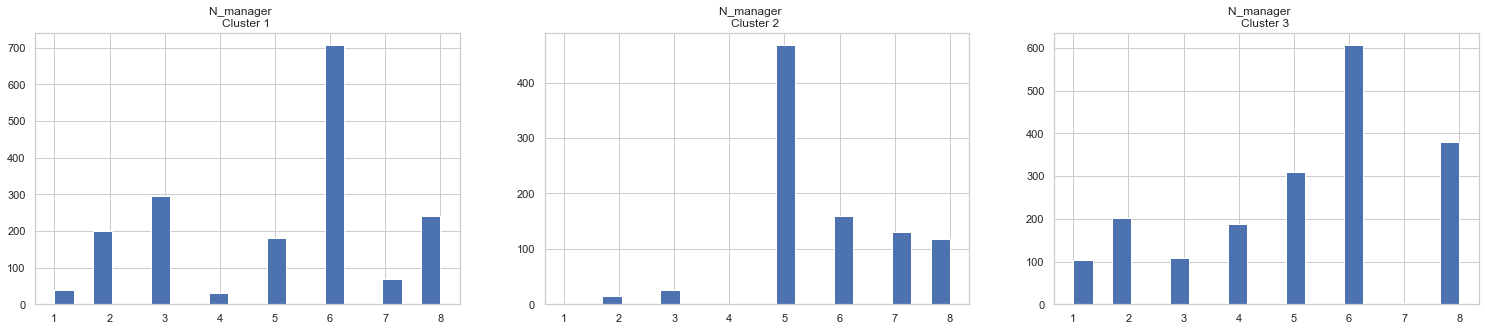

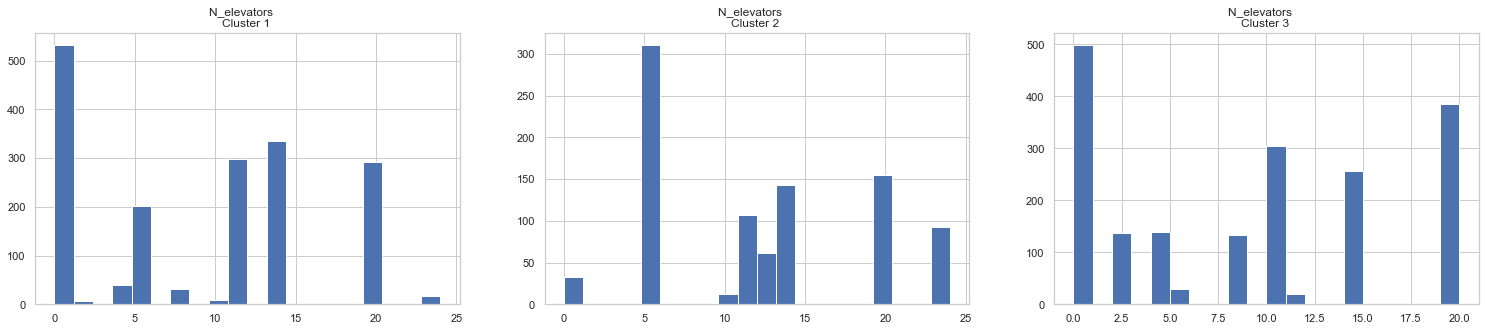

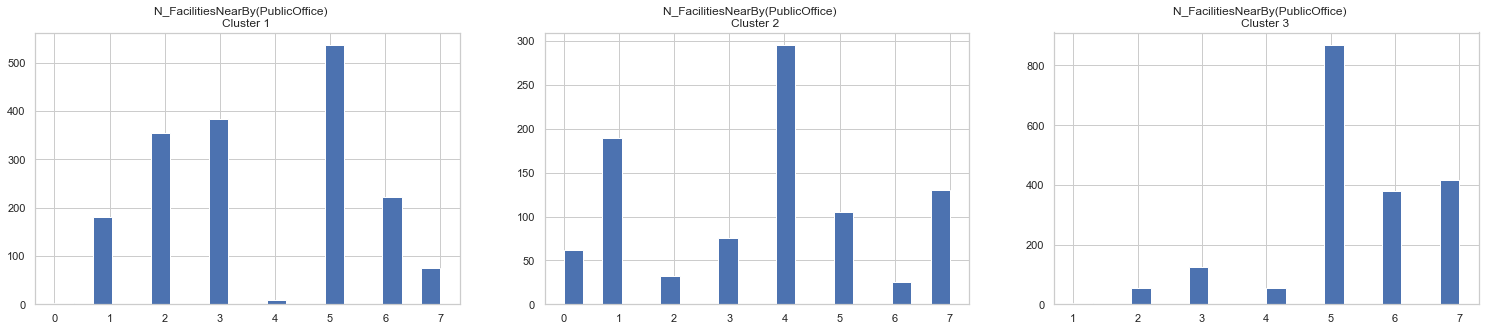

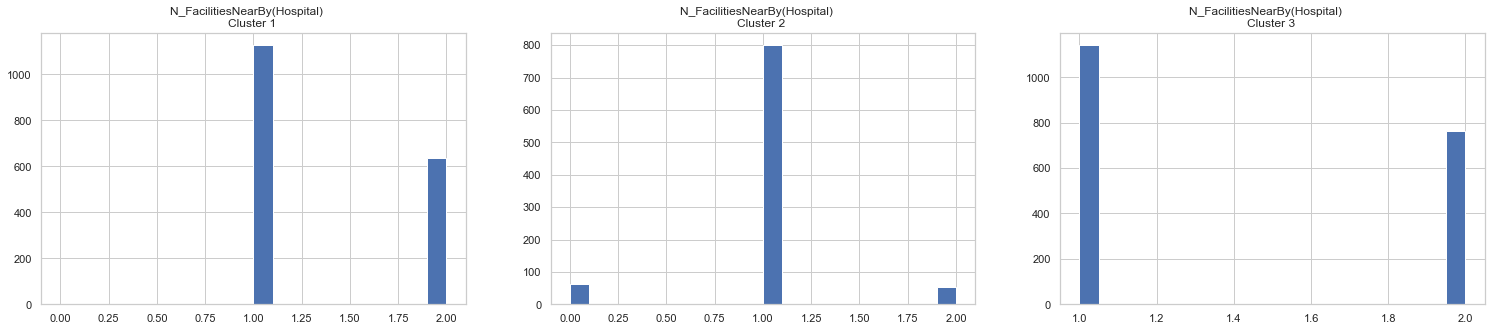

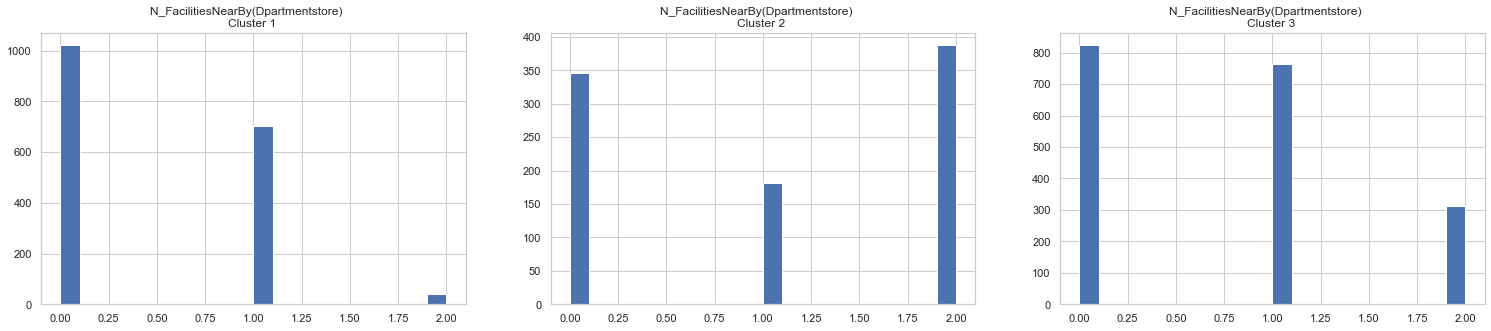

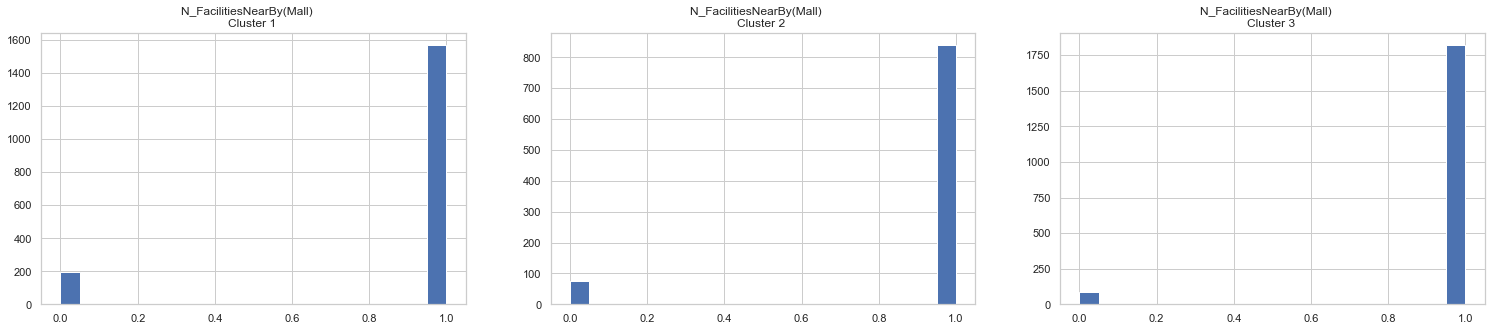

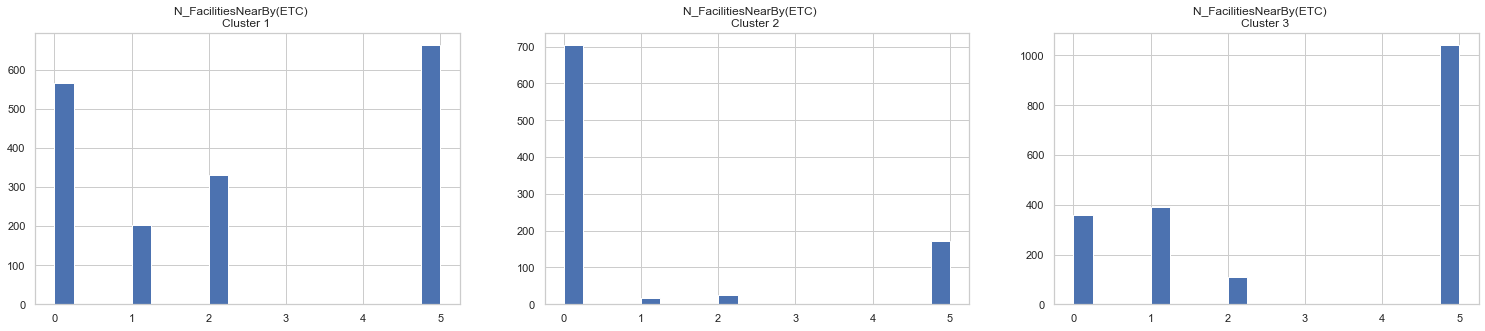

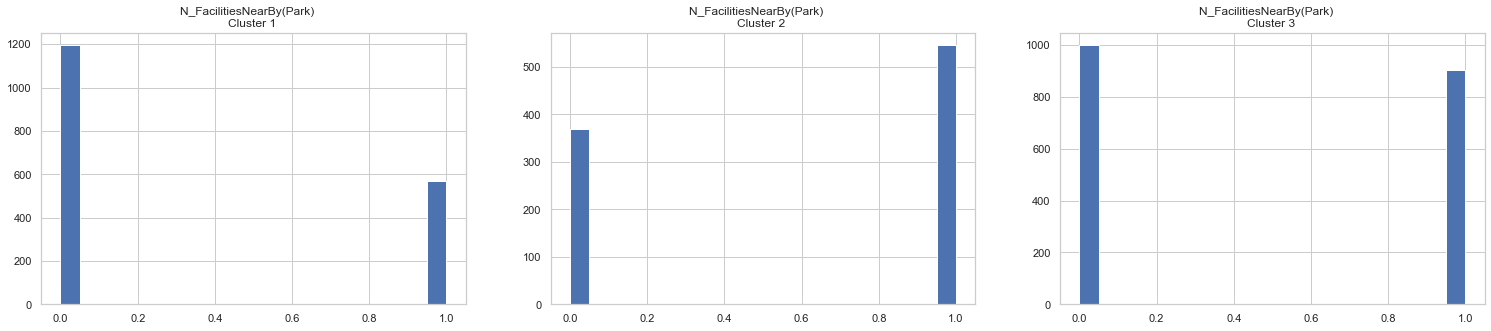

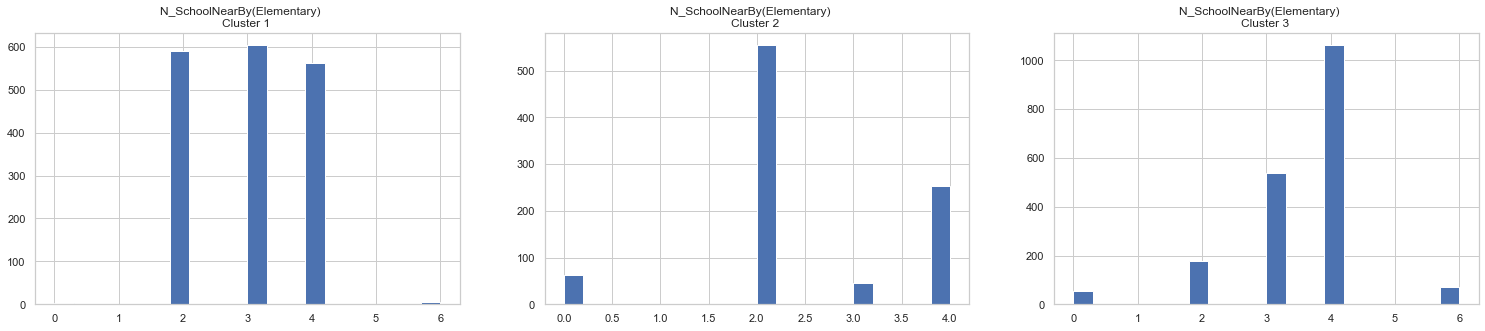

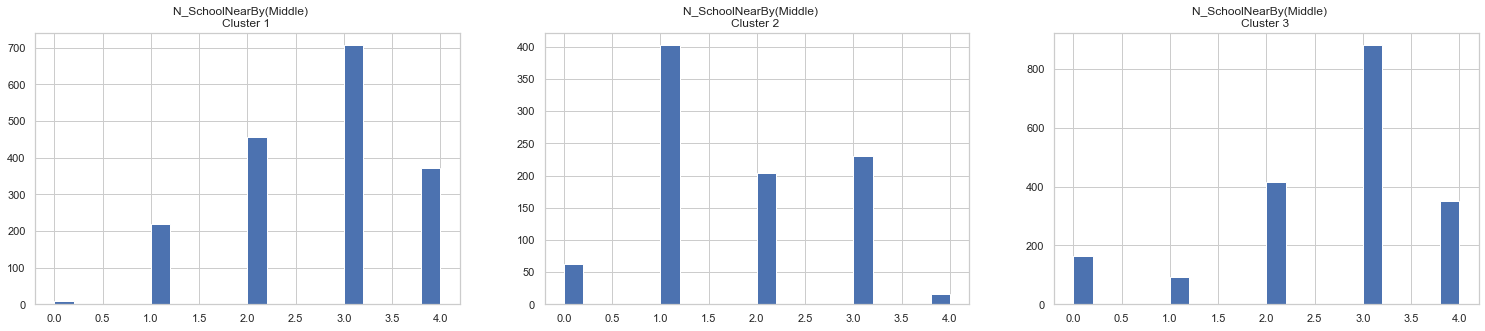

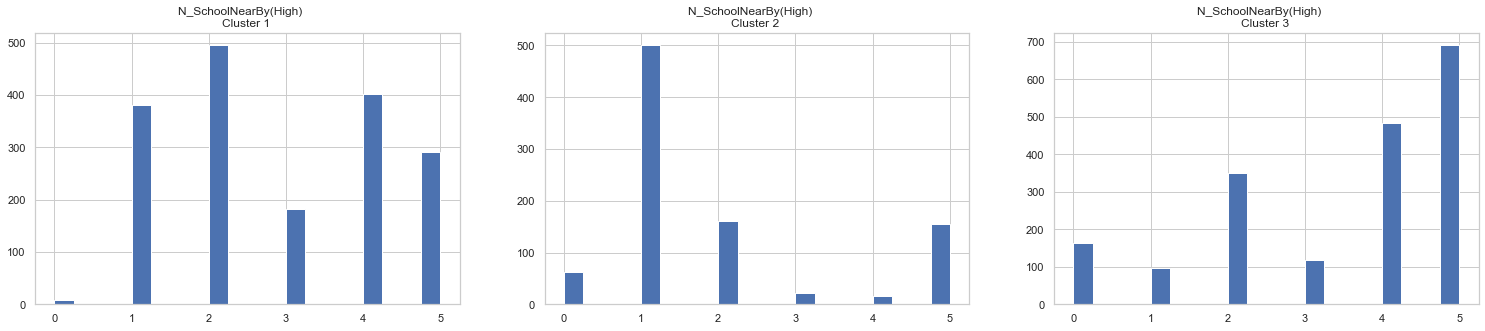

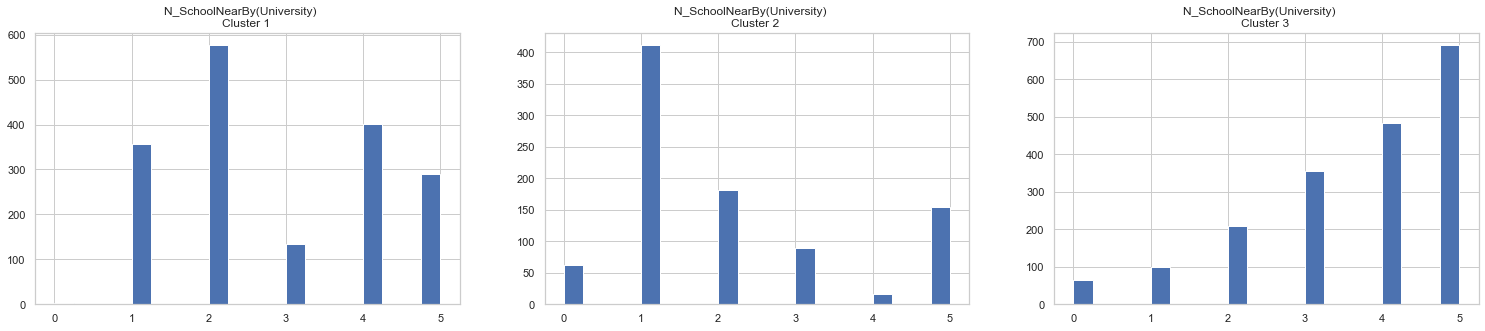

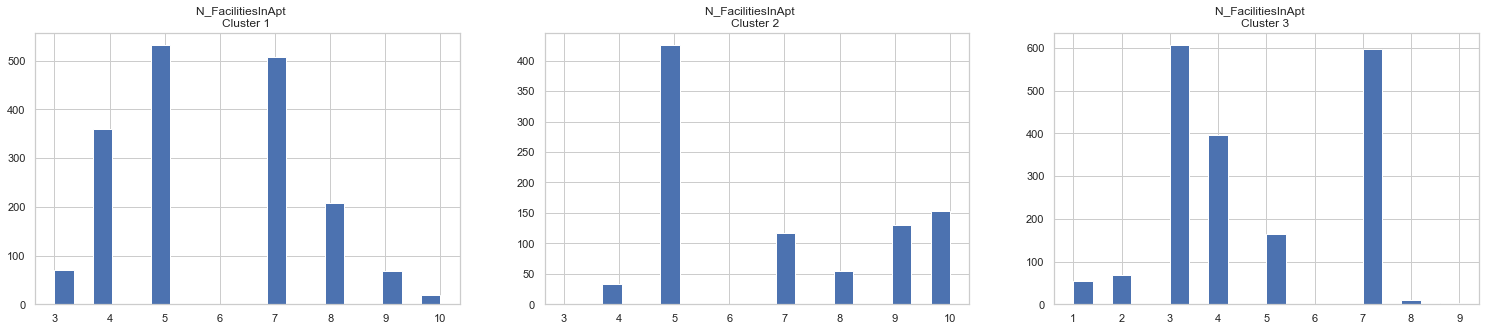

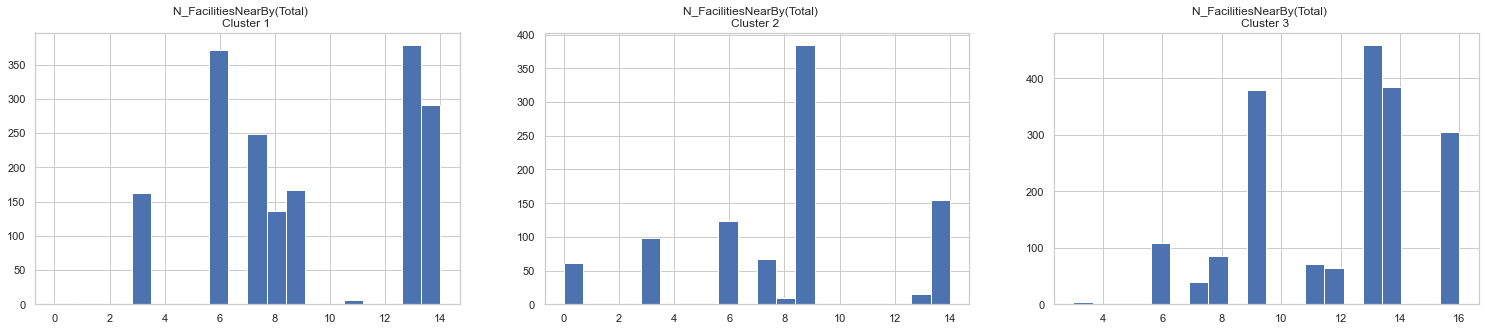

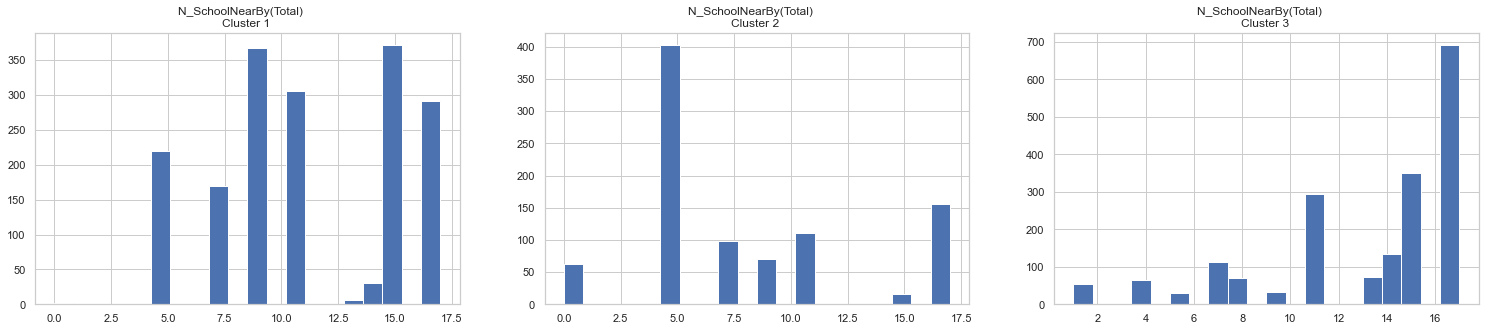

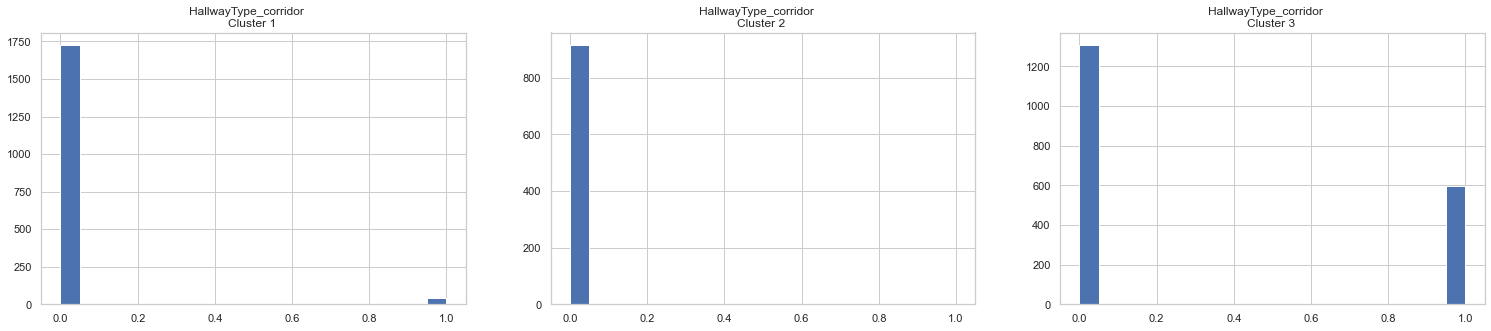

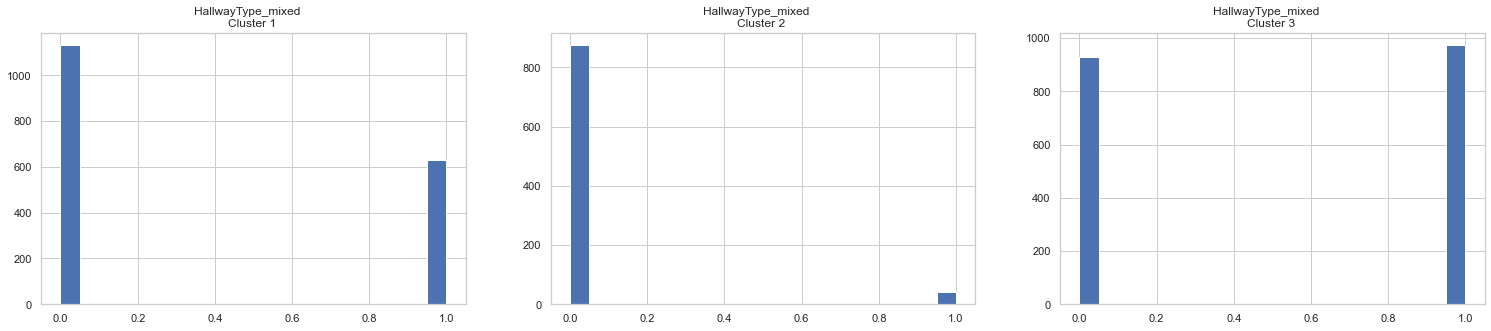

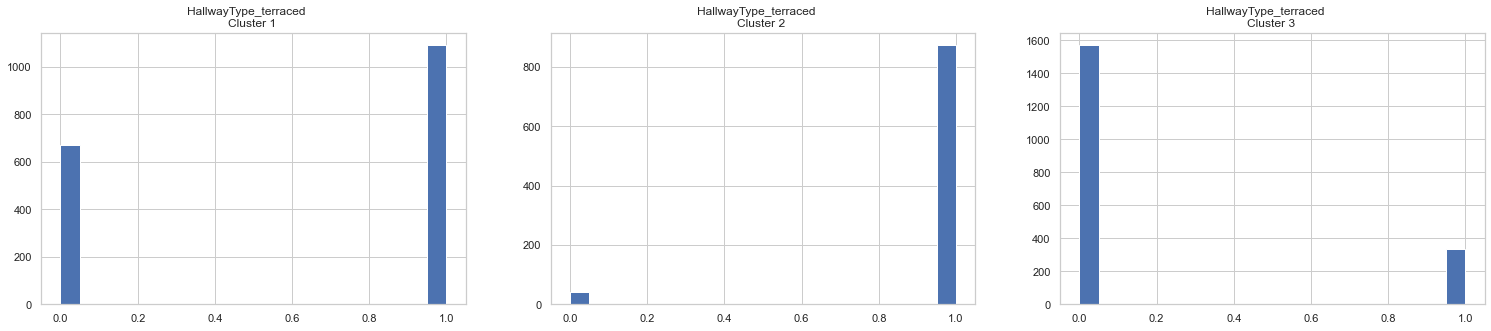

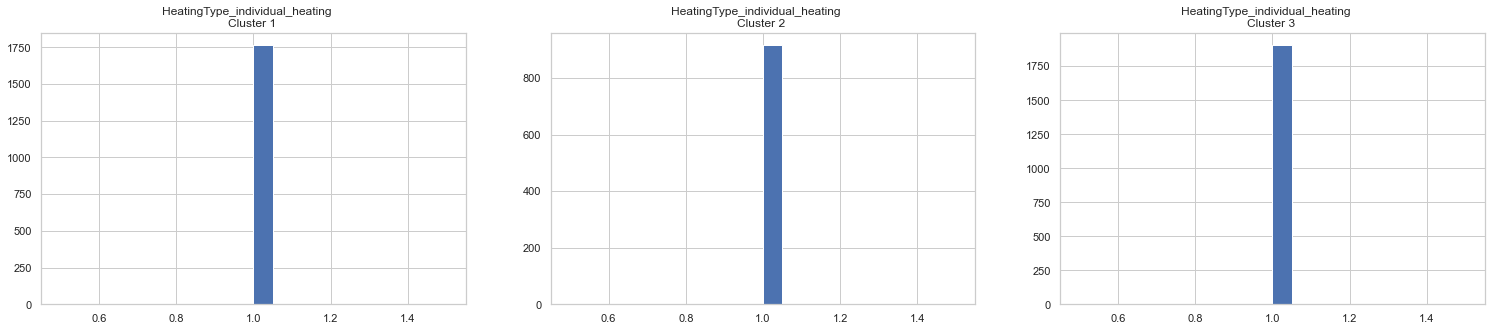

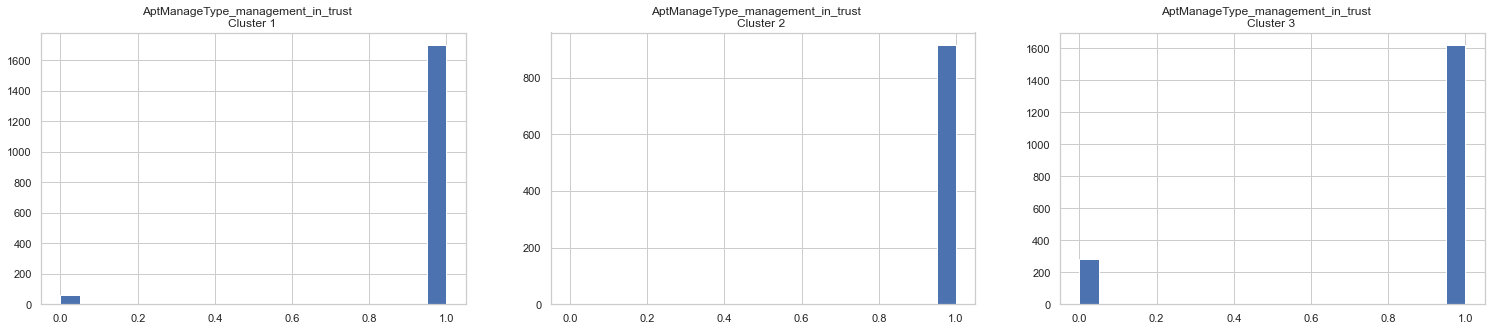

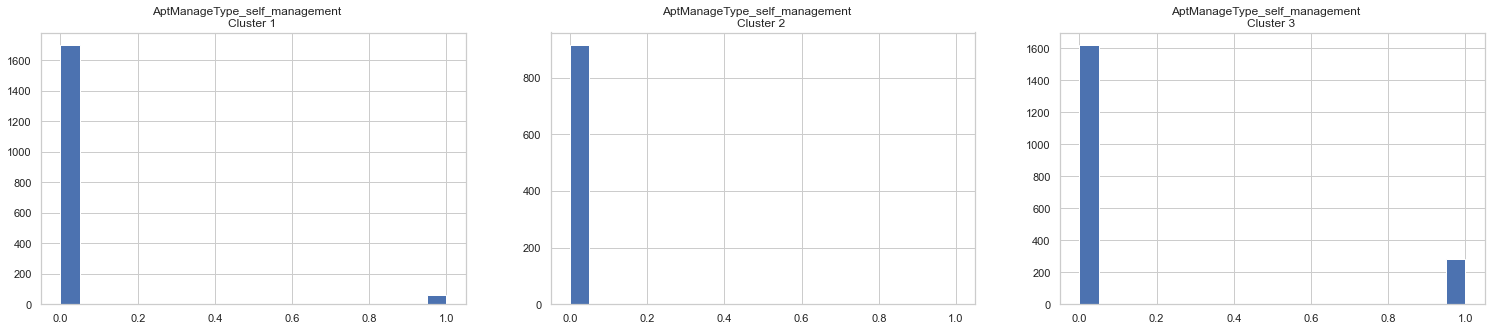

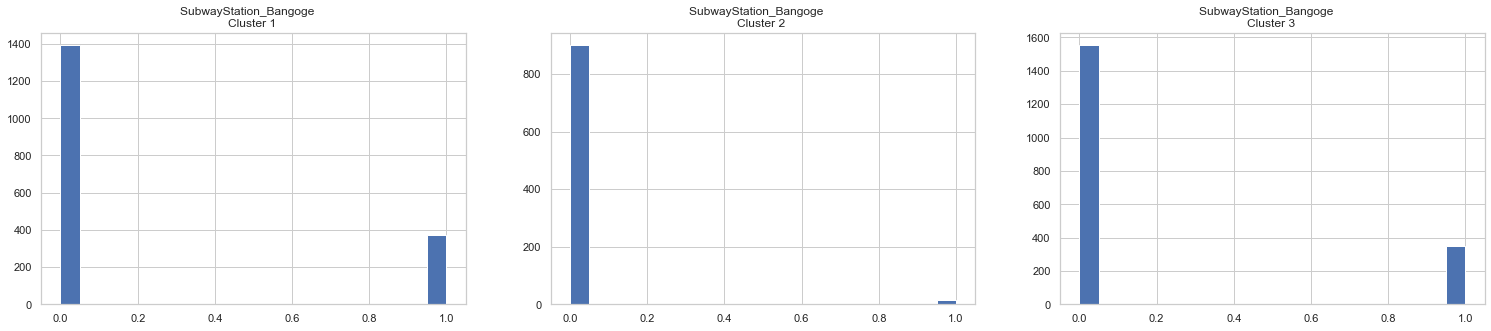

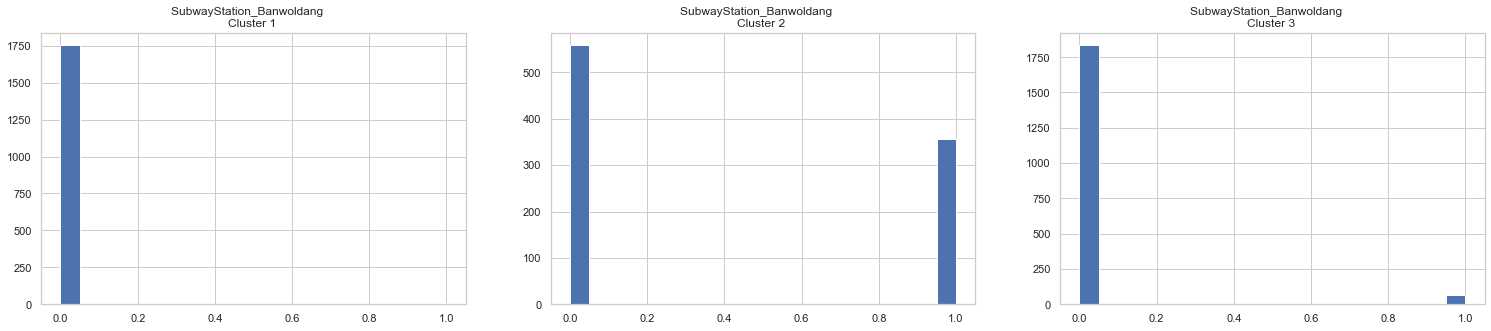

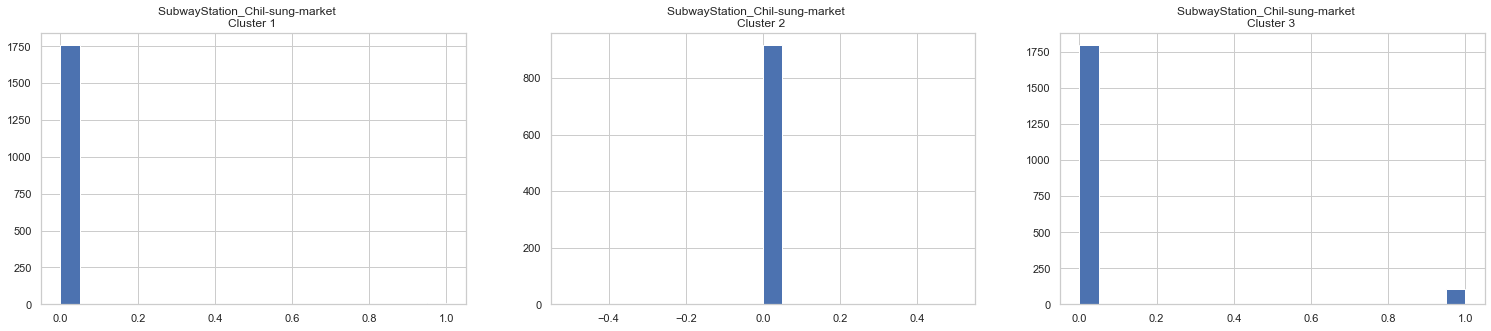

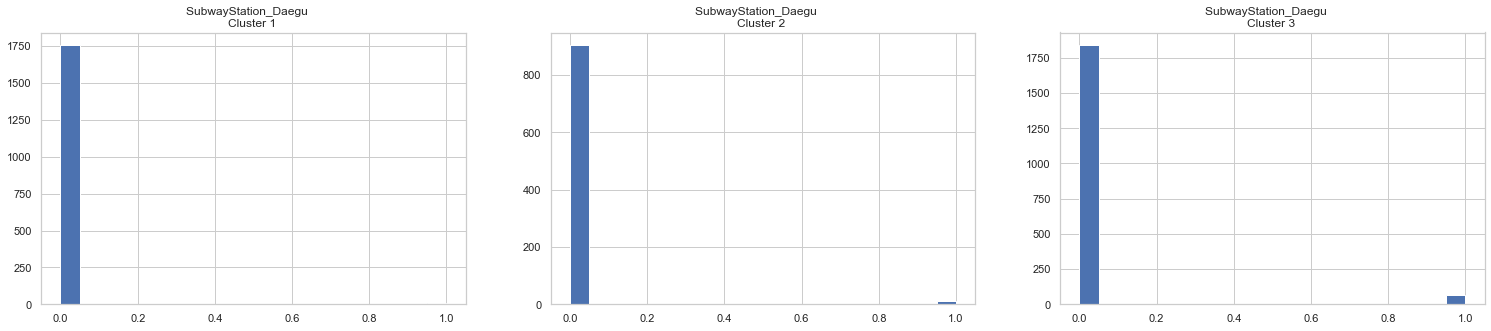

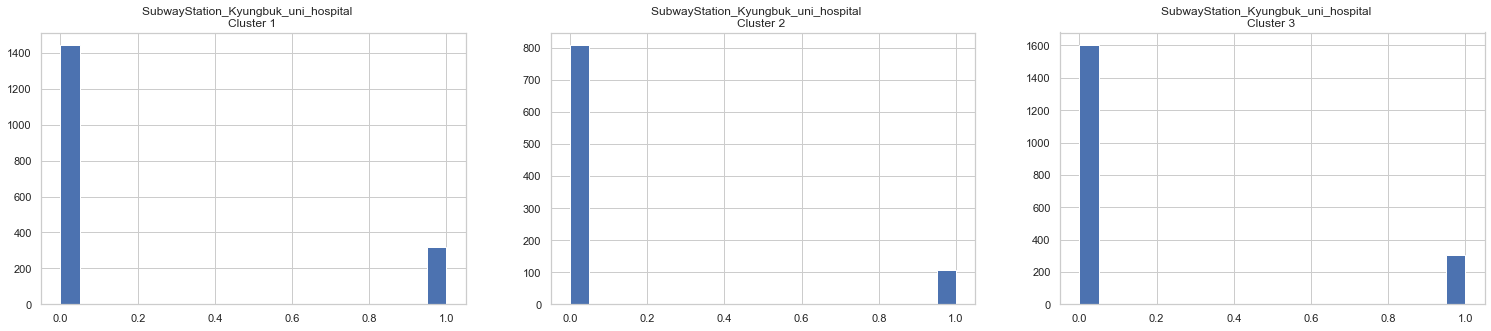

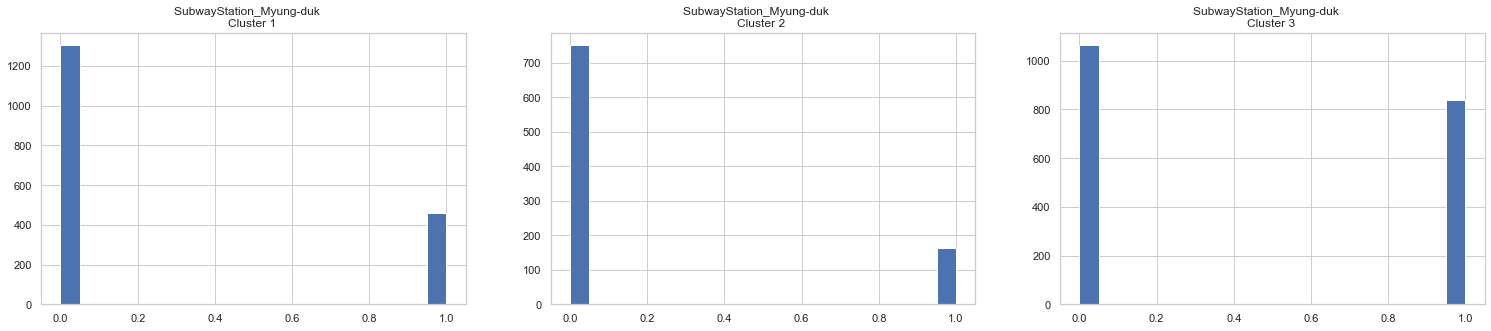

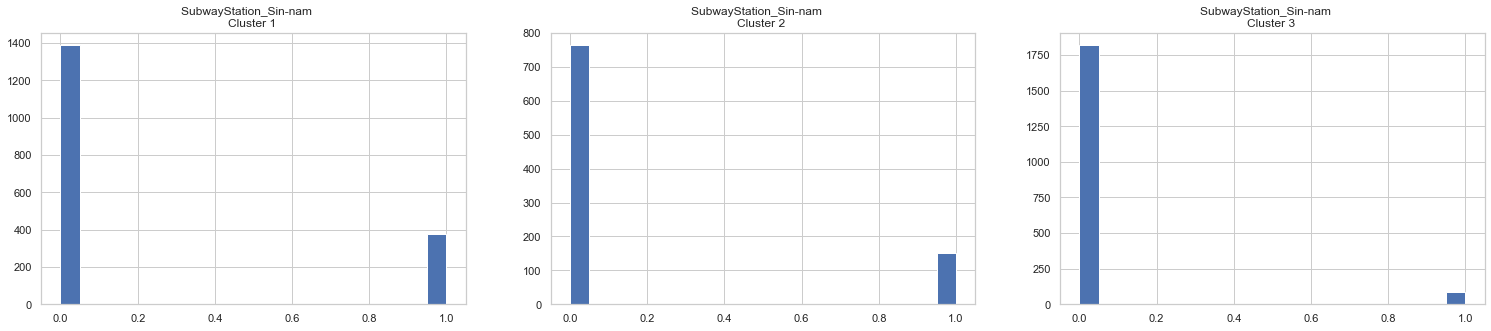

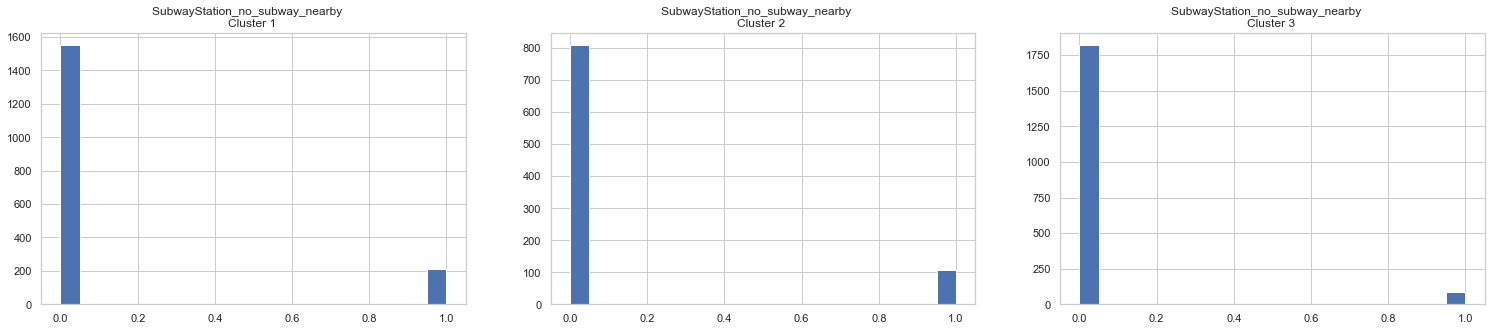

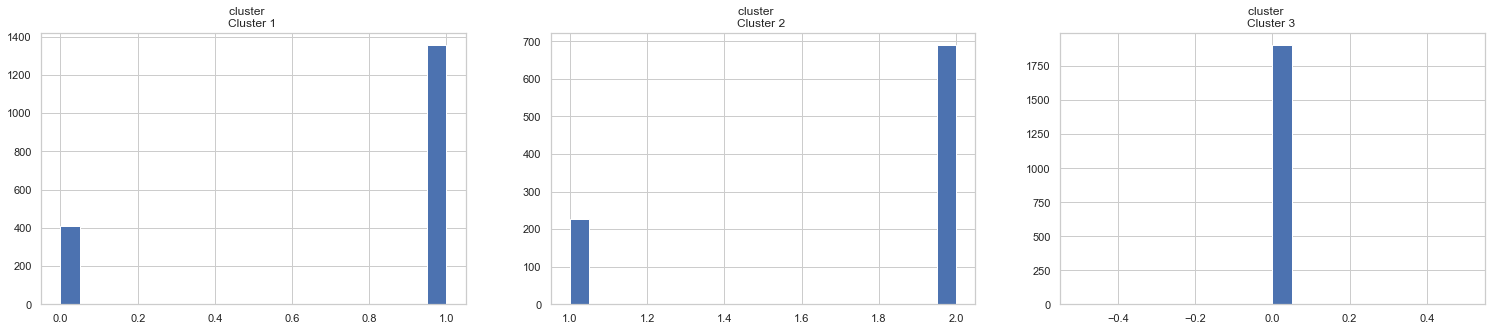

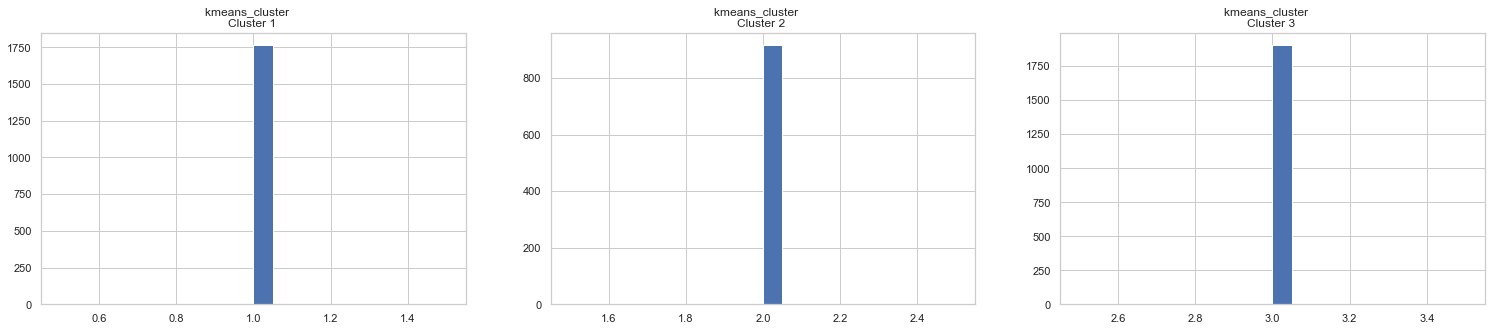

In [50]:
for i in data.columns:
    plt.figure(figsize = (35, 5))
    for j in range(1,4):
        plt.subplot(1,4,j+1)
        cluster = data[data['kmeans_cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))
  
    plt.show()

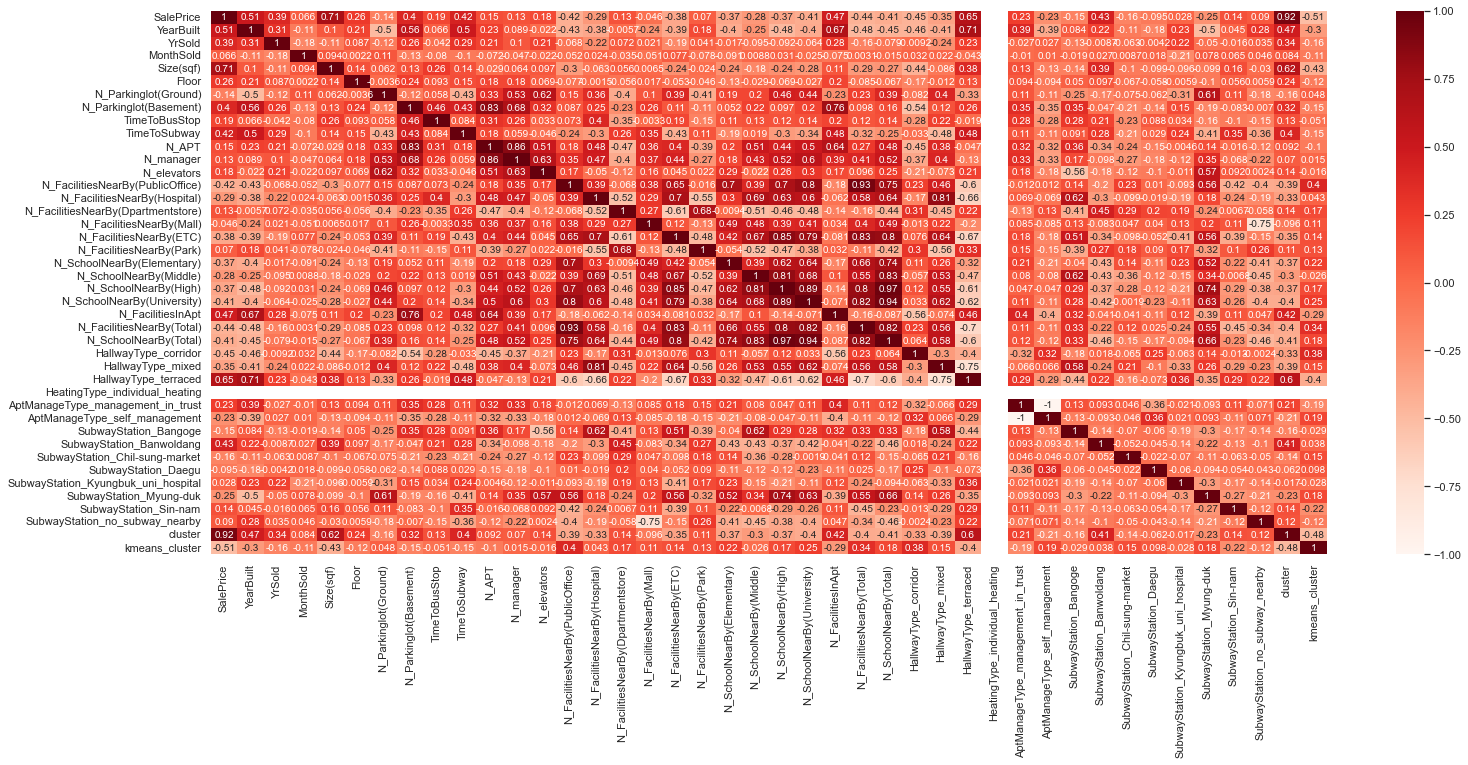

In [51]:
plt.figure(figsize=(25,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [52]:
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

SalePrice               1.000000
YearBuilt               0.507052
Size(sqf)               0.712138
HallwayType_terraced    0.648388
cluster                 0.919760
kmeans_cluster          0.511924
Name: SalePrice, dtype: float64

In [71]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_features_scaled, labels))

-0.0379873093271672


In [72]:
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(df_features_scaled, labels))

6.669407149222449


In [73]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(df_features_scaled, labels))

116.95717296336994


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

In [54]:
X = data.drop(["SalePrice"],1)  
y = data["SalePrice"]          

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

C:\Users\lenovo\AppData\Local\Temp/ipykernel_12756/2530521854.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop(["SalePrice"],1)


4418.295937611416

In [55]:
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 15],
             "n_estimators": [200, 500],
             "min_samples_split": [2, 5, 8]}

rf_model = RandomForestRegressor(random_state=42)
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)
rf_cv_model.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'max_depth': None,
 'max_features': 15,
 'min_samples_split': 2,
 'n_estimators': 500}

In [56]:
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)

y_pred = rf_tuned.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

4250.661514157138

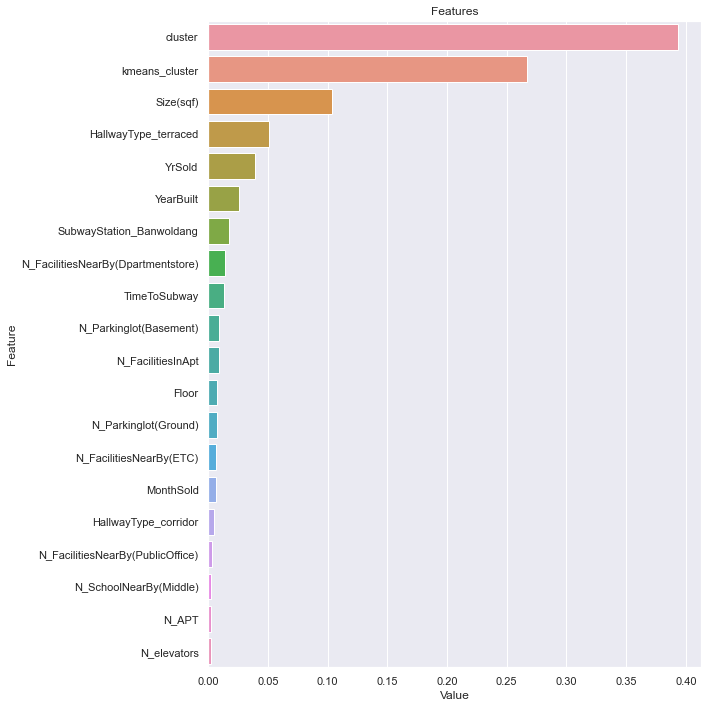

In [57]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_tuned, X, 20)

In [58]:
X = data.drop(["SalePrice"],1)  
y = data["SalePrice"]         

reg = LassoCV()
reg.fit(X, y)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_12756/3568843393.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop(["SalePrice"],1)


LassoCV()

In [59]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 23016.610878
Best score using built-in LassoCV: 0.828409


In [60]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 33 variables


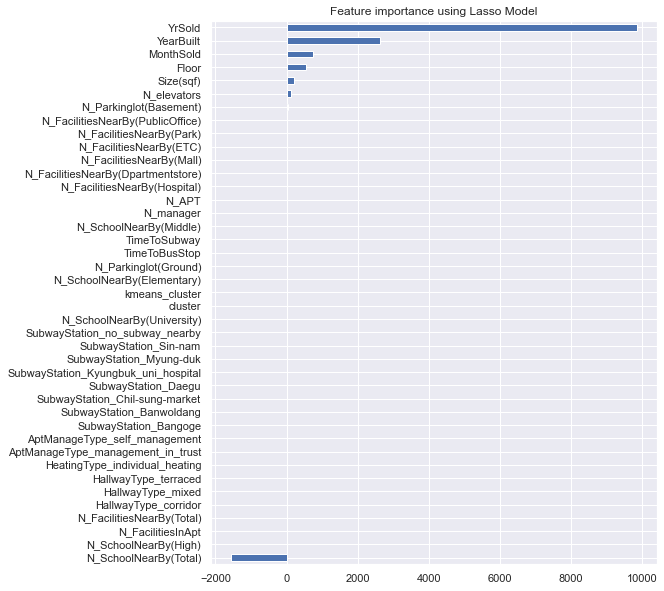

In [61]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

In [65]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(data)
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [66]:
data['ClusterDBSCAN'] = pd.Series(clustering.labels_)


print(data.ClusterDBSCAN.unique().size)

data[data.ClusterDBSCAN==-1]

293


SalePrice  YearBuilt  YrSold  MonthSold  Size(sqf)  Floor  \
0        141592       2006    2007          8        814      3   
1         51327       1985    2007          8        587      8   
2         48672       1985    2007          8        587      6   
4        221238       1993    2007          8       1761      3   
5         35840       1992    2007          8        355      5   
...         ...        ...     ...        ...        ...    ...   
4574     147761       2013    2016          1        644      7   
4575     147761       2013    2016          1        644      9   
4576     144752       2013    2016          1        644      5   
4577     103663       2013    2016          1        426     10   
4578     150778       2013    2016          1        644     15   

      N_Parkinglot(Ground)  N_Parkinglot(Basement)  TimeToBusStop  \
0                    111.0                   184.0              1   
1                     80.0                    76.0              2   
2                     80.0                    76.0              2   
4                    523.0                   536.0              2   
5                    200.0                     0.0              1   
...                    ...                     ...            ...   
4574                   8.0                   930.0              2   
4575                   8.0                   930.0              2   
4576                   8.0                   930.0              2   
4577                   8.0                   930.0              2   
4578                   8.0                   930.0              2   

      TimeToSubway  ...  SubwayStation_Banwoldang  \
0                2  ...                         0   
1                3  ...                         0   
2                3  ...                         0   
4                1  ...                         0   
5                2  ...                         0   
...            ...  ...                       ...   
4574             4  ...                         0   
4575             4  ...                         0   
4576             4  ...                         0   
4577             4  ...                         0   
4578             4  ...                         0   

      SubwayStation_Chil-sung-market  SubwayStation_Daegu  \
0                                  0                    0   
1                                  0                    1   
2                                  0                    1   
4                                  0                    0   
5                                  0                    0   
...                              ...                  ...   
4574                               0                    0   
4575                               0                    0   
4576                               0                    0   
4577                               0                    0   
4578                               0                    0   

      SubwayStation_Kyungbuk_uni_hospital  SubwayStation_Myung-duk  \
0                                       1                        0   
1                                       0                        0   
2                                       0                        0   
4                                       0                        1   
5                                       0                        1   
...                                   ...                      ...   
4574                                    1                        0   
4575                                    1                        0   
4576                                    1                        0   
4577                                    1                        0   
4578                                    1                        0   

      SubwayStation_Sin-nam  SubwayStation_no_subway_nearby  cluster  \
0                         0                               0        0   
1                

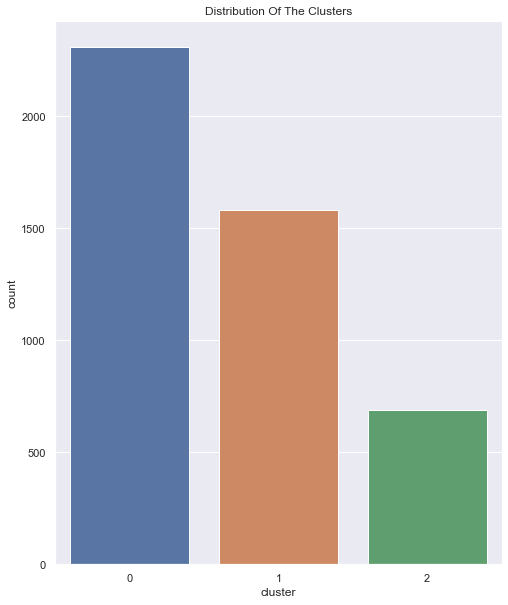

In [67]:
pl = sns.countplot(x=data["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling

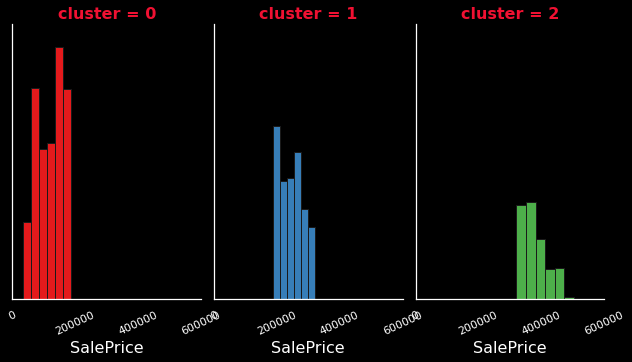

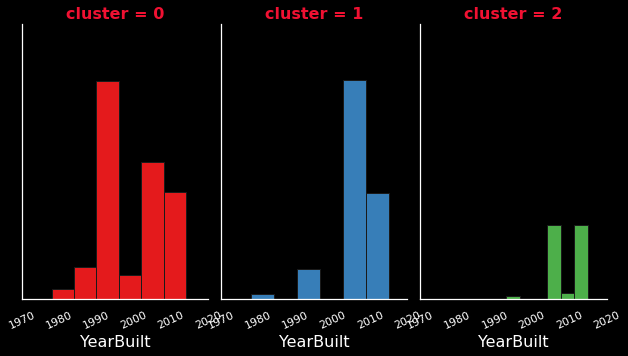

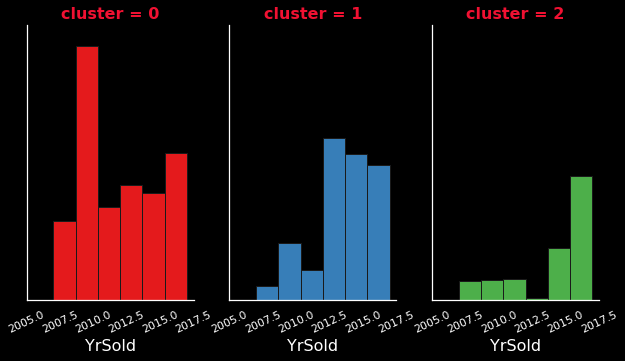

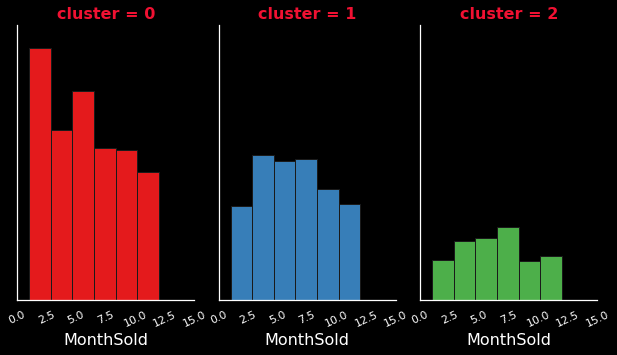

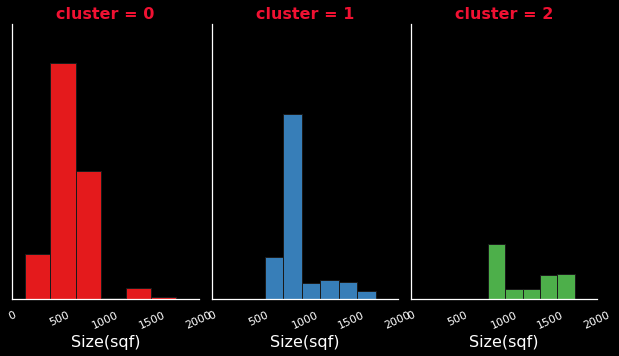

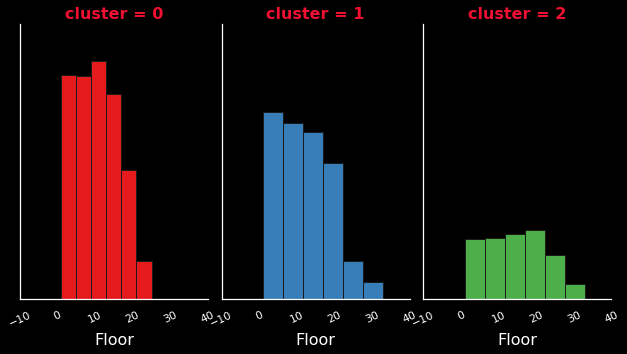

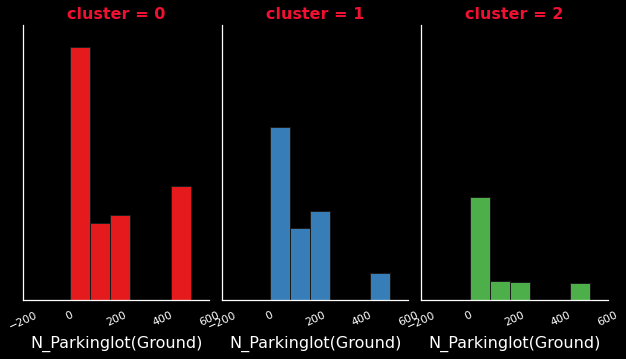

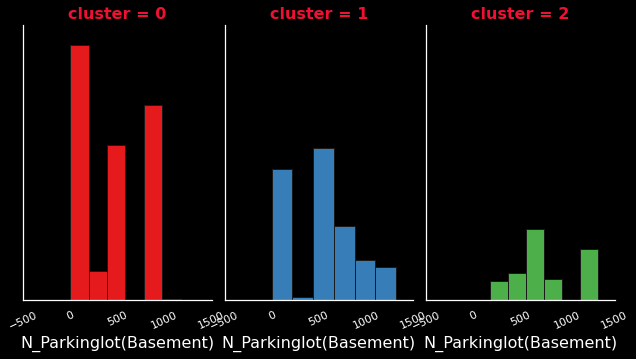

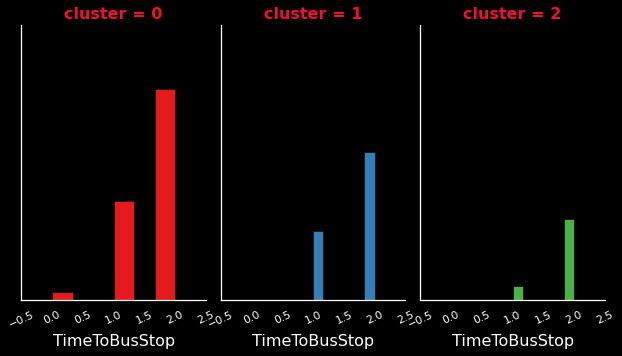

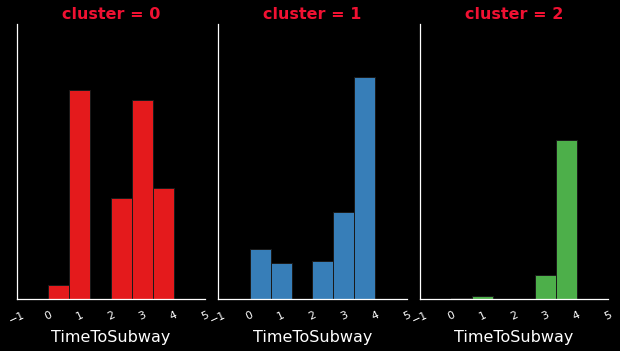

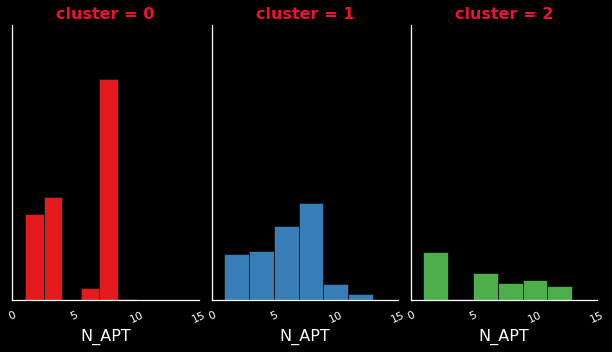

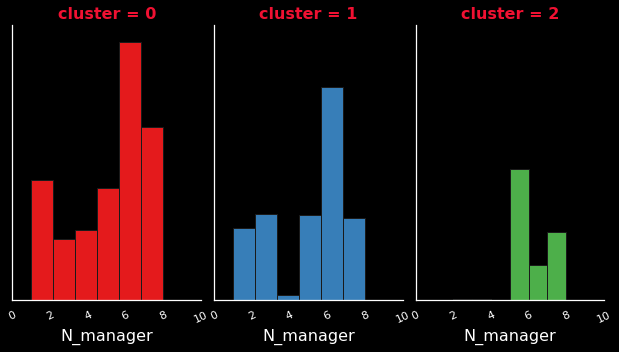

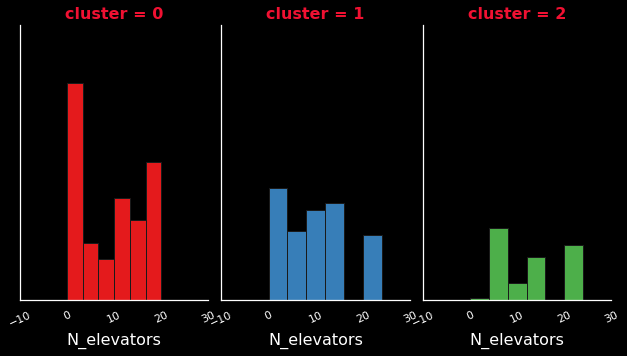

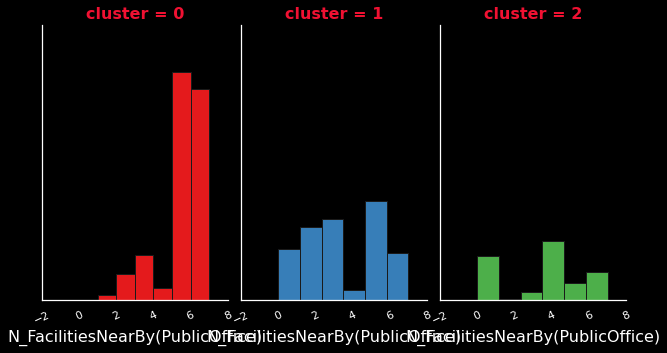

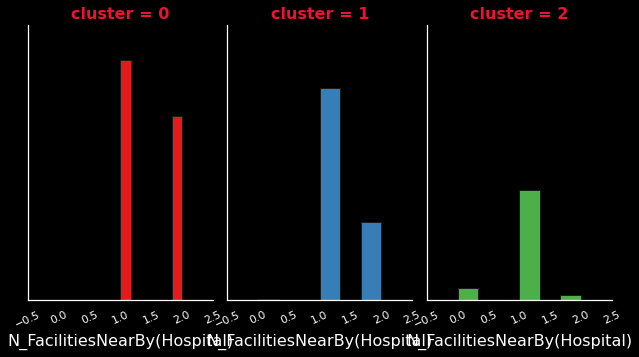

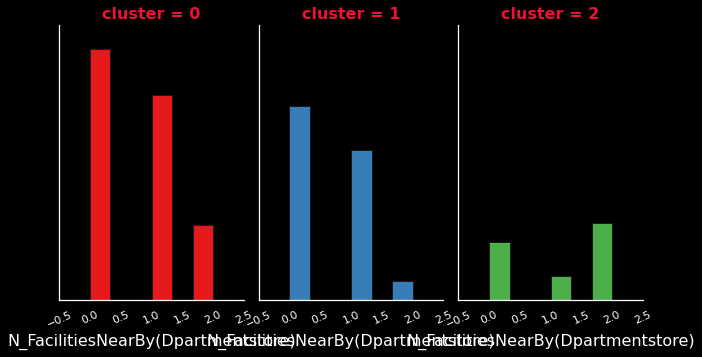

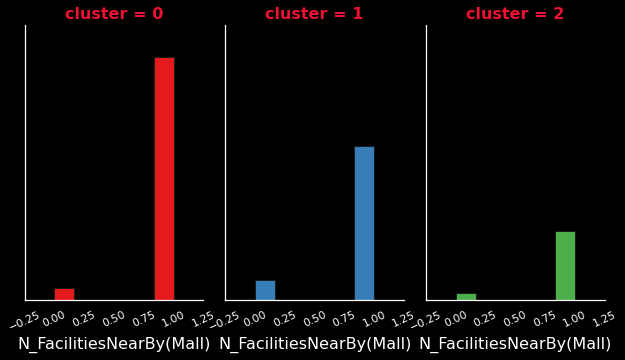

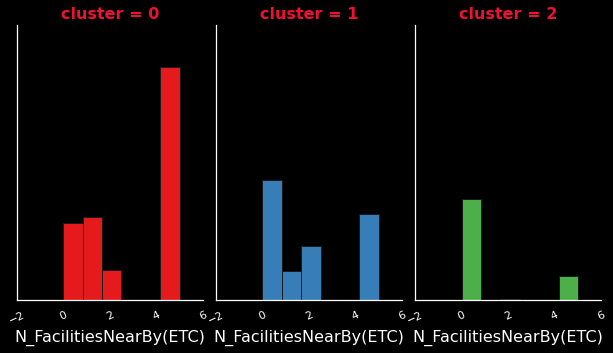

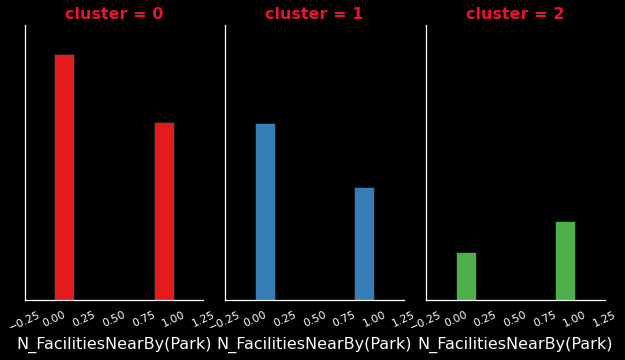

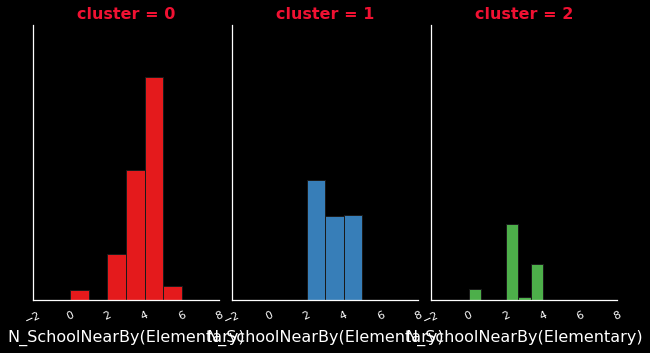

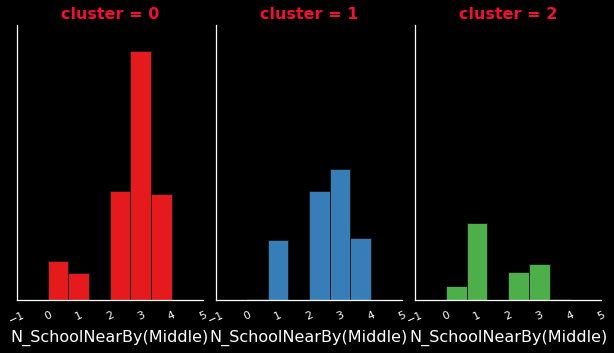

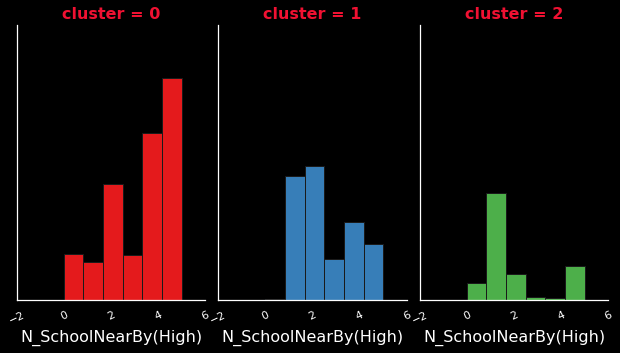

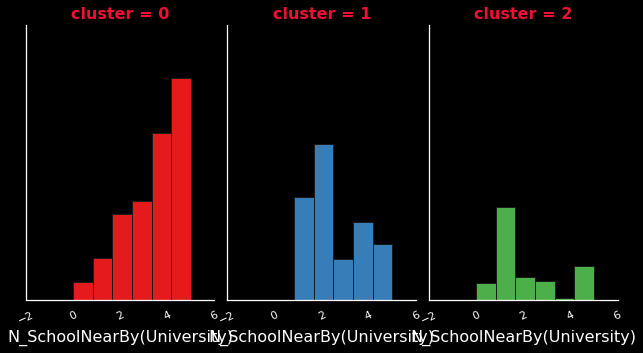

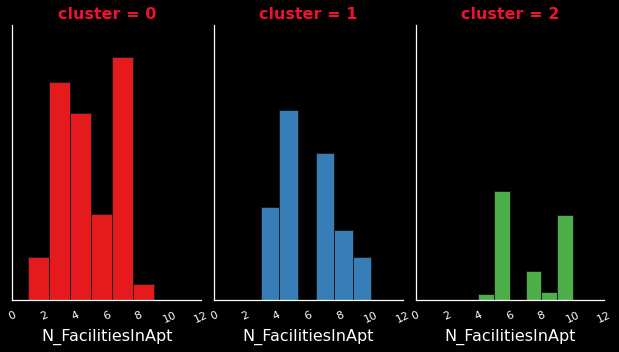

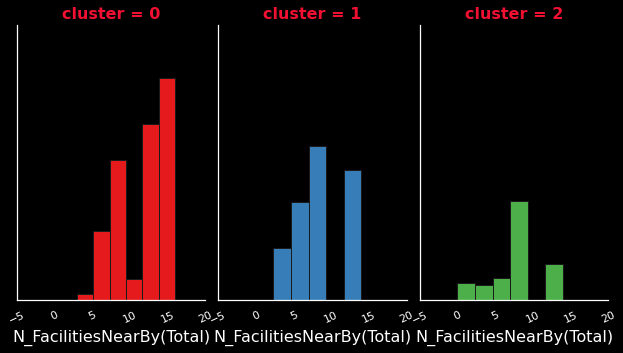

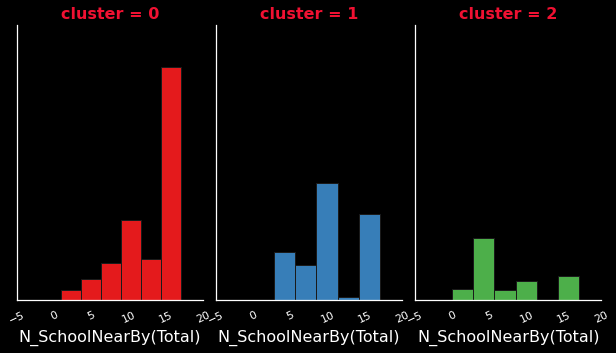

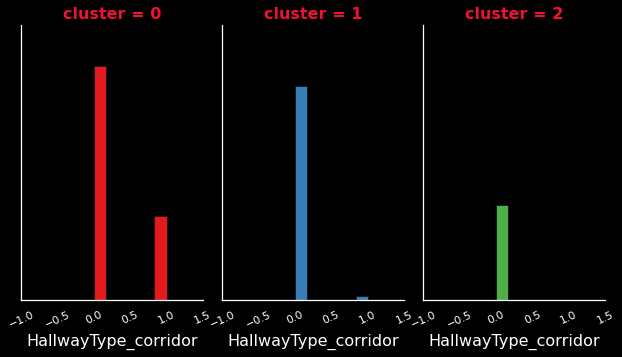

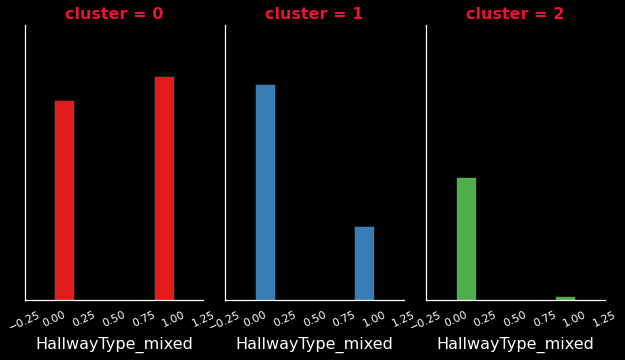

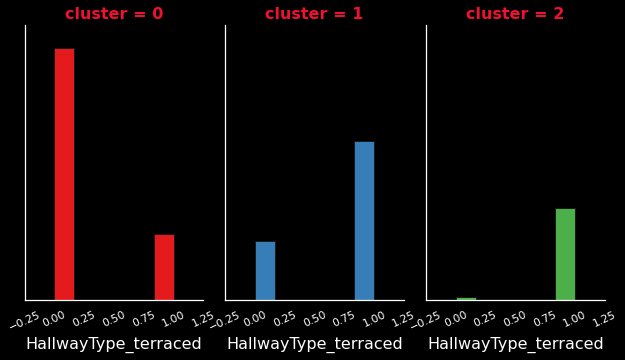

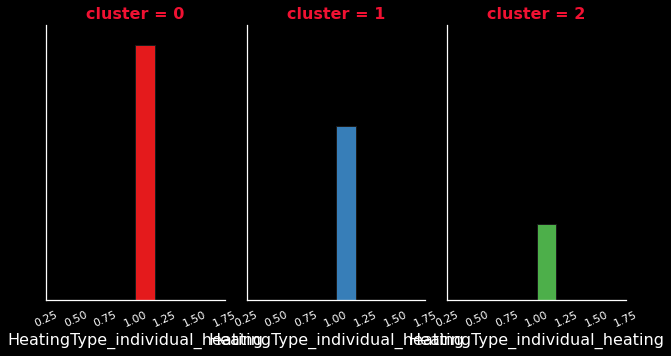

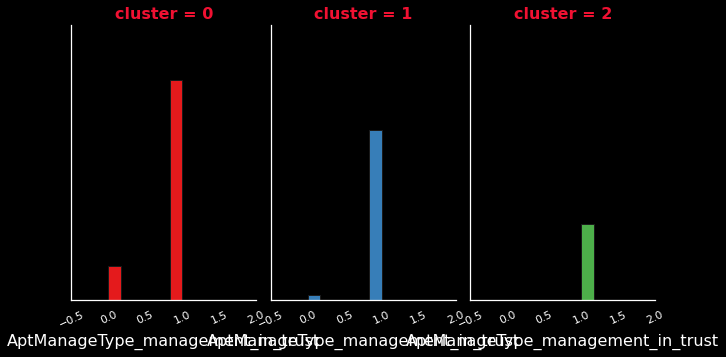

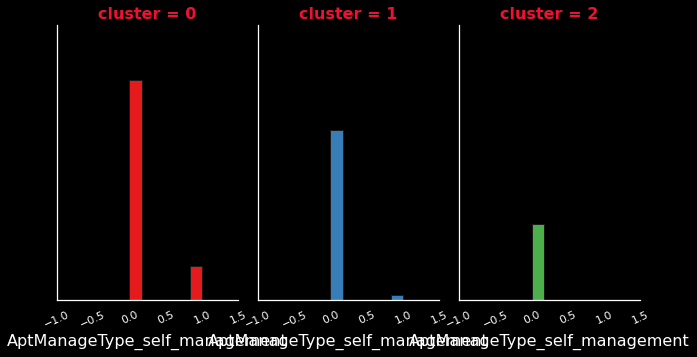

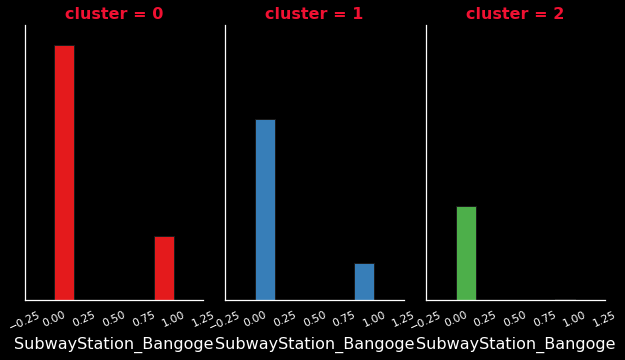

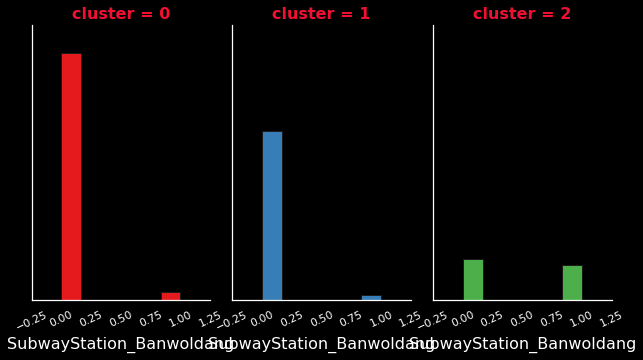

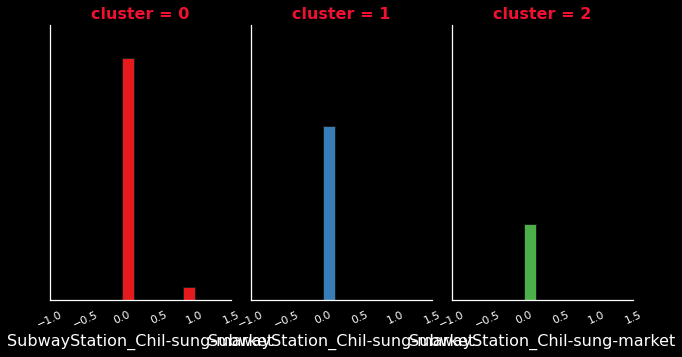

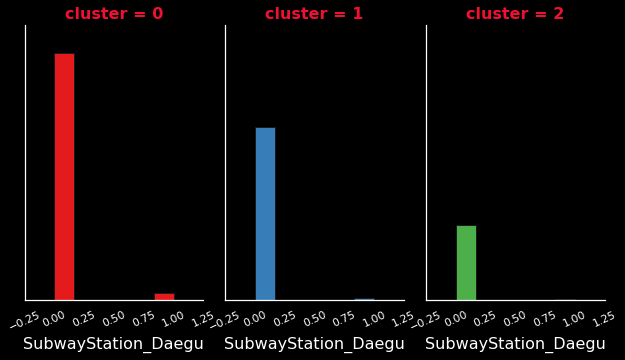

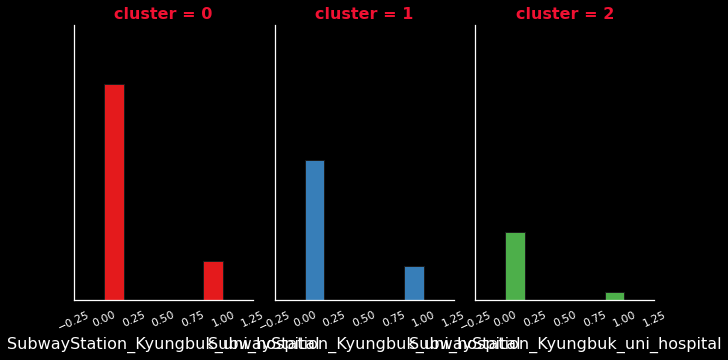

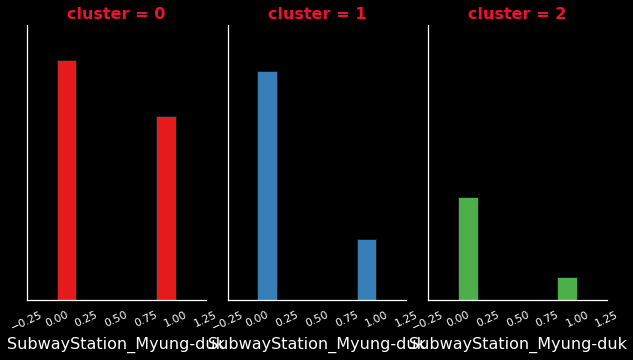

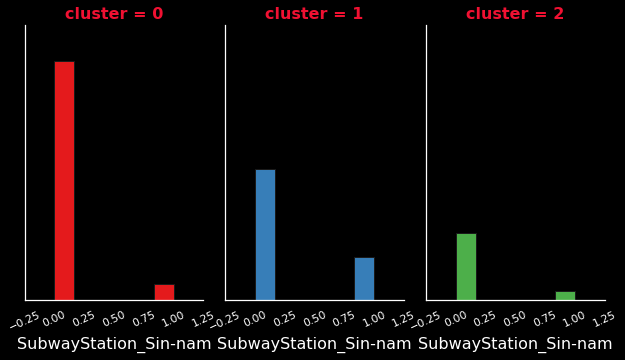

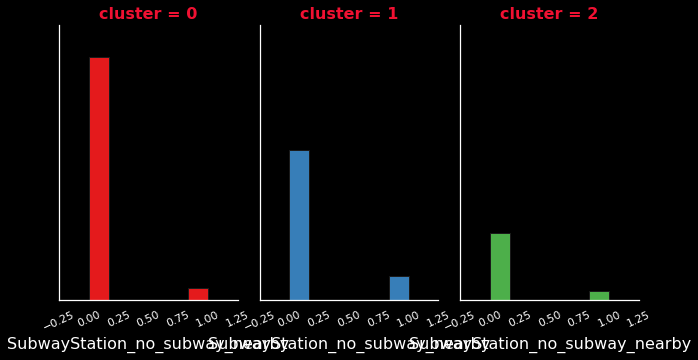

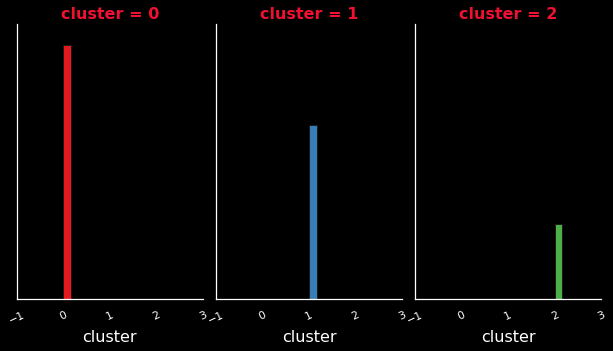

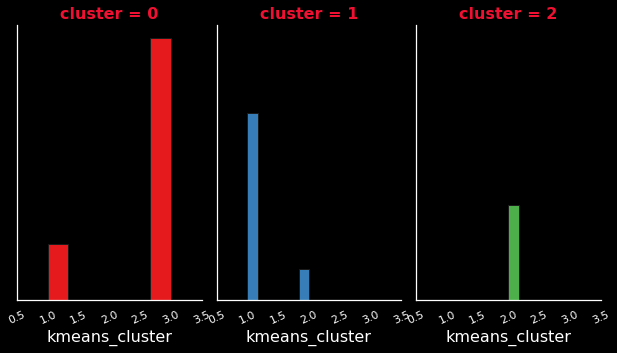

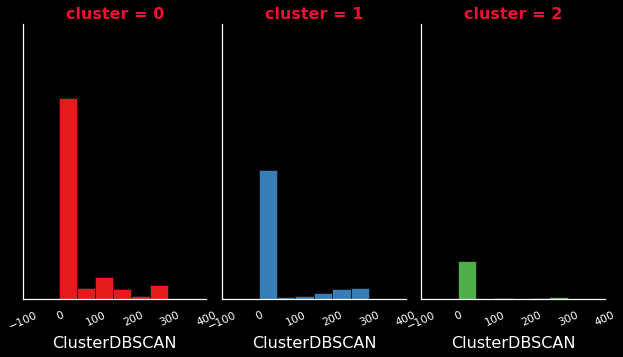

In [68]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in data:
    diag = sns.FacetGrid(data, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)